# Import Libraries

In [1]:
import pandas as pd 
# Makes sure we see all columns
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
# Load the data from the csv file and display it in the notebook with the first row as the header

data = pd.read_csv("data/BST_V1toV10.csv", header=0, sep=";")
data.head()


VAGUE   Q1  Q2  STATUTTV  SECTEUR  TAILLE  Q4_3A6  Q4_7A12  Q4_13A17  \
0      1  2.0 NaN       4.0      1.0     3.0     0.0      0.0       0.0   
1      1  2.0 NaN       3.0      3.0     3.0     0.0      0.0       0.0   
2      1  2.0 NaN       3.0      3.0     3.0     2.0      0.0       0.0   
3      1  2.0 NaN       3.0      3.0     4.0     0.0      0.0       0.0   
4      1  2.0 NaN       2.0      3.0     3.0     0.0      0.0       2.0   

   Q4_SUP18   Q5  EVACTENT   Q9  Q10  Q12  Q13_1  Q13_2  Q13_4  Q13_5  Q13_6  \
0       0.0  2.0       NaN  1.0  2.0  4.0    1.0    1.0    1.0    4.0    1.0   
1       0.0  2.0       NaN  1.0  2.0  2.0    4.0    3.0    2.0    1.0    3.0   
2       0.0  2.0       NaN  1.0  2.0  2.0    3.0    3.0    3.0    1.0    4.0   
3       0.0  2.0       NaN  1.0  1.0  2.0    1.0    1.0    1.0    1.0    1.0   
4       2.0  2.0       NaN  1.0  2.0  1.0    4.0    4.0    4.0    1.0    4.0   

   Q13_7  Q14_1  Q14_2  Q14_3  Q14_4  Q15_1  Q15_3  Q15_4  Q15_5  Q15_6  \
0    1.0    2.0    2.0    2.0    1.0    1.0    1.0    2.0    1.0    1.0   
1    3.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    4.0    3.0   
2    1.0    2.0    2.0    2.0    2.0    2.0    2.0    1.0    3.0    1.0   
3    1.0    1.0    1.0    2.0    2.0    1.0    1.0    1.0    1.0    1.0   
4    4.0    2.0    2.0    2.0    2.0    2.0    3.0    3.0    3.0    3.0   

   Q15_7  Q15_8  Q15_9  Q15_10  Q15_11  Q15_12  Q15_13  Q15_14  Q15_17  \
0    3.0    2.0    3.0     NaN     2.0     3.0     4.0     2.0     3.0   
1    1.0    2.0    4.0     2.0     3.0     1.0     1.0     2.0     3.0   
2    2.0    2.0    3.0     2.0     3.0     2.0     2.0     2.0     3.0   
3    2.0    1.0    2.0     2.0     1.0     2.0     1.0     2.0     2.0   
4    2.0    3.0    3.0     2.0     2.0     2.0     2.0     2.0     2.0   

   Q15_18  Q15_19  EVRYTHM  Q16_3  Q16_4  Q17_1  Q17_3  Q17_4  Q19_1  Q19_2  \
0     2.0     NaN      NaN    NaN    NaN    1.0    NaN    NaN    NaN    NaN   
1     2.0     NaN      NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN   
2     3.0     NaN      NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN   
3     1.0     NaN      NaN    NaN    NaN    2.0    NaN    NaN    NaN    NaN   
4     2.0     NaN      NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN   

   Q19_3  Q19_4  Q19_5  Q19_6  Q19_7  Q19_8  Q19_9  Q19_10  Q19_11  Q19_12  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN   

   Q19_13  Q19_14  Q19_15  Q19_16  Q19_17  Q22_1  Q22_2  Q22_3  Q22_4  Q22_5  \
0     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
1     NaN     NaN     NaN     NaN     NaN    3.0    NaN    NaN    NaN    NaN   
2     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
3     NaN     NaN     NaN     NaN     NaN    1.0    2.0    NaN    NaN    NaN   
4     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   

   Q23_1  Q25  Q31_1  Q31_2  Q31_3  Q31_4  Q31_5  Q31_6  Q34_1  Q34_2  Q34_3  \
0    2.0  2.0    NaN    NaN    NaN    NaN    NaN    NaN    3.0    NaN    NaN   
1    4.0  2.0    NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN   
2    2.0  1.0    NaN    NaN    NaN    NaN    NaN    NaN    2.0    NaN    NaN   
3    4.0  1.0    NaN    NaN    NaN    NaN    NaN    NaN    2.0    NaN    NaN   
4    4.0  2.0    NaN    NaN    NaN    NaN    NaN    NaN    2.0    NaN    NaN   

   Q34_4  Q37  Q38_1  Q38_2  Q40M3JR  Q403A5JR  Q401SEMR  Q40SU1MR  Q40SU3M  \
0    NaN  3.0    2.0    2.0        1         2         1         1        1   
1    NaN  2.0    2.0    2.0        1         2         1         1        1   
2    NaN  3.0    2.0    2.0     

In [3]:
# get column names from colNames.csv

colNames = pd.read_csv("data/colNames.csv",sep=";",header=None, encoding='MacRoman')
colNames.head()

0                                         1
0     VAGUE                                  YEAR MMS
1        Q1                             Q1- Your sex?
2        Q2                      Q2- How old are you?
3  STATUTTV                                    STATUS
4   SECTEUR  In which sector of activity do you work?

## Change the column names

In [4]:
# change column names to the ones in the colNames file

for i in data.columns:
    for j in range(len(colNames)):
        if(i == colNames.iloc[j,0]):
            data.rename(columns={i:colNames.iloc[j,1]},inplace=True)

# Analyse the initial dataset

In [5]:
data.columns

Index(['YEAR MMS', 'Q1- Your sex?', 'Q2- How old are you?', 'STATUS',
       'In which sector of activity do you work?',
       'What is the size of your business (in total, all locations combined)? 2009 fake',
       'Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?',
       'Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?',
       'Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?',
       'Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?',
       ...
       'Q44- Over the last 12 months have you experienced the following difficulties (excluding traumatic accident)? (Wrong-to the eyes',
       'Q57- How do you most frequently eat your midday meal?',
       'Q58- For each of these drinks, indicate whether you consume them:-Ev

In [6]:
# check the shape of the data

data.shape

(44535, 105)

In [7]:
# check the info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44535 entries, 0 to 44534
Columns: 105 entries, YEAR MMS to onhotencode
dtypes: float64(98), int64(7)
memory usage: 35.7 MB


In [8]:
# Check for missing values

data.isnull().sum()

YEAR MMS                                                                                                                                                                                                          0
Q1- Your sex?                                                                                                                                                                                                    34
Q2- How old are you?                                                                                                                                                                                           2341
STATUS                                                                                                                                                                                                            2
In which sector of activity do you work?                                                                                                                

In [9]:
# Check the description of the data

data.describe()

YEAR MMS  Q1- Your sex?  Q2- How old are you?        STATUS  \
count  44535.000000   44501.000000          42194.000000  44533.000000   
mean       5.725250       1.470596              7.279021      2.602677   
std        2.753581       0.499140             12.925888      1.159376   
min        1.000000       1.000000              1.000000      1.000000   
25%        3.000000       1.000000              2.000000      1.000000   
50%        6.000000       1.000000              3.000000      3.000000   
75%        8.000000       2.000000              5.000000      4.000000   
max       10.000000       2.000000             76.000000      4.000000   

       In which sector of activity do you work?  \
count                              44533.000000   
mean                                   4.367009   
std                                    2.916375   
min                                    1.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    8.000000   
max                                    9.000000   

       What is the size of your business (in total, all locations combined)? 2009 fake  \
count                                       44509.000000                                 
mean                                            2.829630                                 
std                                             1.268036                                 
min                                             1.000000                                 
25%                                             2.000000                                 
50%                                             3.000000                                 
75%                                             4.000000                                 
max                                             6.000000                                 

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42873.000000                                                                   
mean                                            0.204604                                                                   
std                                             0.495812                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42872.000000                                                                    
mean                                            0.272229                                                                    
std                                             0.599071                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                         

# Clean the data

## Change "Age" to categories
- Some of the data was in categories and some were in numerical.
- Take the vales that are in numerical and change them to the given categories

    - 1 - Under 30
    - 2 - 30 to 39 years old
    - 3 - 40 to 44 years old
    - 4 - 45 to 49 years old
    - 5 - 50 to 55 years old
    - 6 - 56 years and over
    - 7 - No response

In [10]:
# check each value in the "Q2- How old are you?" column, if the value in that row is > 17, change the value to the category in the dataset
# bins=[16, 29.9, 39.9, 44.9, 49.9, 55.9, float('inf')], labels=[1, 2, 3, 4, 5, 6]

for i in range(len(data["Q2- How old are you?"])):
    if data["Q2- How old are you?"][i] > 17:
        if data["Q2- How old are you?"][i] > 16 and data["Q2- How old are you?"][i] < 29.9:
            data['Q2- How old are you?'][i] = 1
        elif data["Q2- How old are you?"][i] > 29.9 and data["Q2- How old are you?"][i] < 39.9:
            data['Q2- How old are you?'][i] = 2
        elif data["Q2- How old are you?"][i] > 39.9 and data["Q2- How old are you?"][i] < 44.9:
            data['Q2- How old are you?'][i] = 3
        elif data["Q2- How old are you?"][i] > 44.9 and data["Q2- How old are you?"][i] < 49.9:
            data['Q2- How old are you?'][i] = 4
        elif data["Q2- How old are you?"][i] > 49.9 and data["Q2- How old are you?"][i] < 55.9:
            data['Q2- How old are you?'][i] = 5
        elif data["Q2- How old are you?"][i] > 55.9 and data["Q2- How old are you?"][i] < float('inf'):
            data['Q2- How old are you?'][i] = 6
            

## Plot the data to analyse

<Figure size 600x600 with 0 Axes>

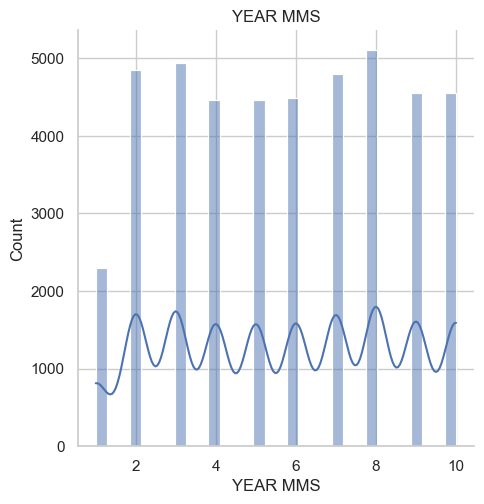

<Figure size 600x600 with 0 Axes>

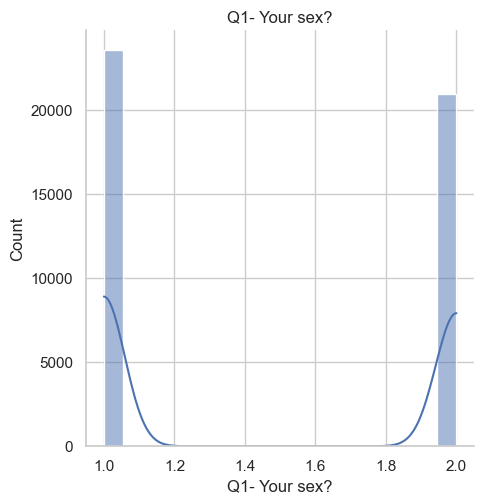

<Figure size 600x600 with 0 Axes>

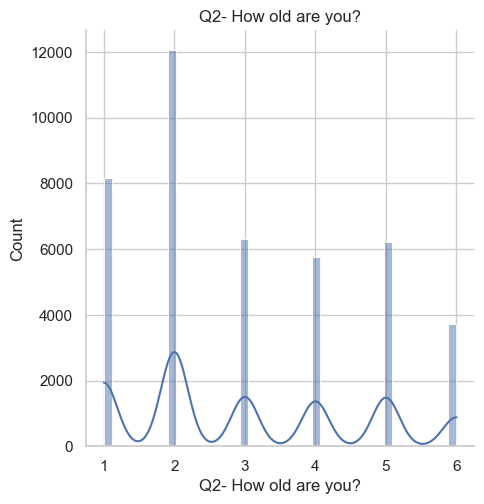

<Figure size 600x600 with 0 Axes>

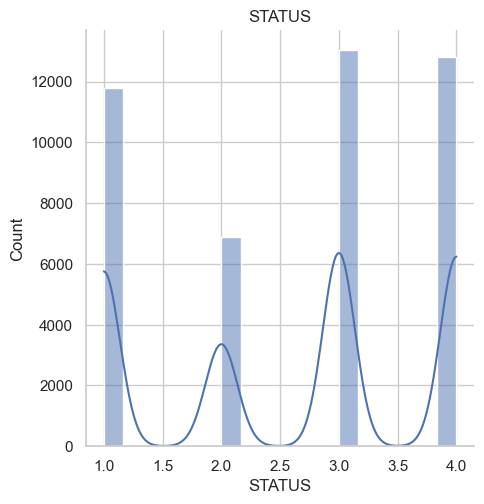

<Figure size 600x600 with 0 Axes>

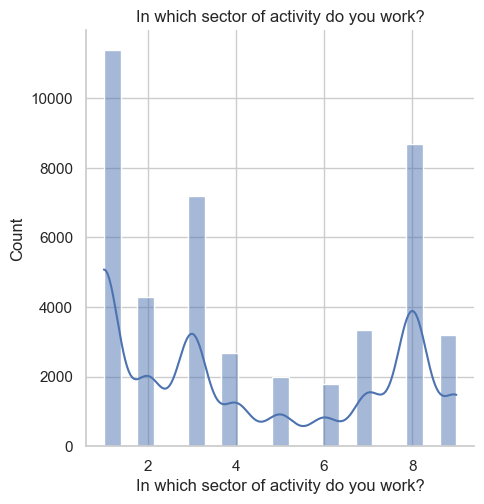

<Figure size 600x600 with 0 Axes>

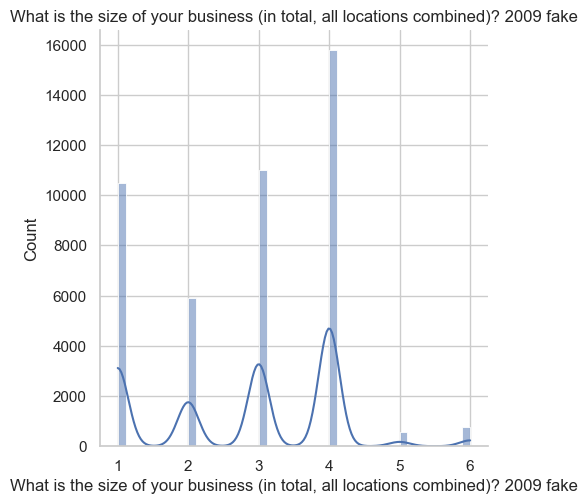

<Figure size 600x600 with 0 Axes>

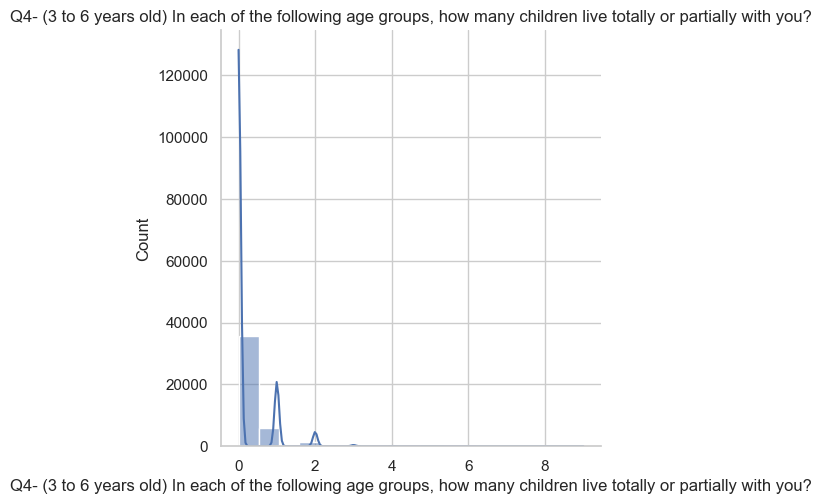

<Figure size 600x600 with 0 Axes>

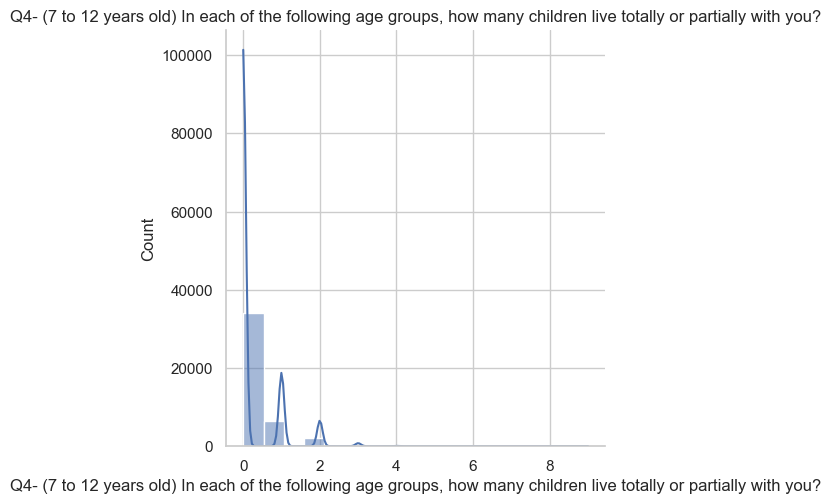

<Figure size 600x600 with 0 Axes>

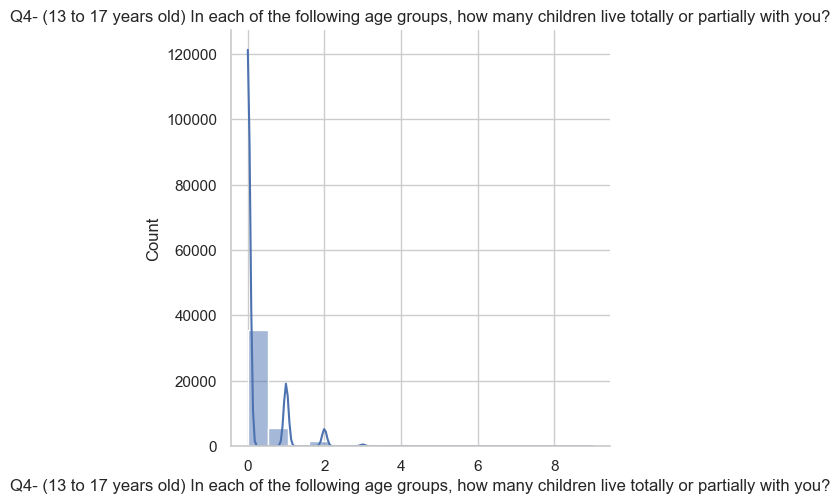

<Figure size 600x600 with 0 Axes>

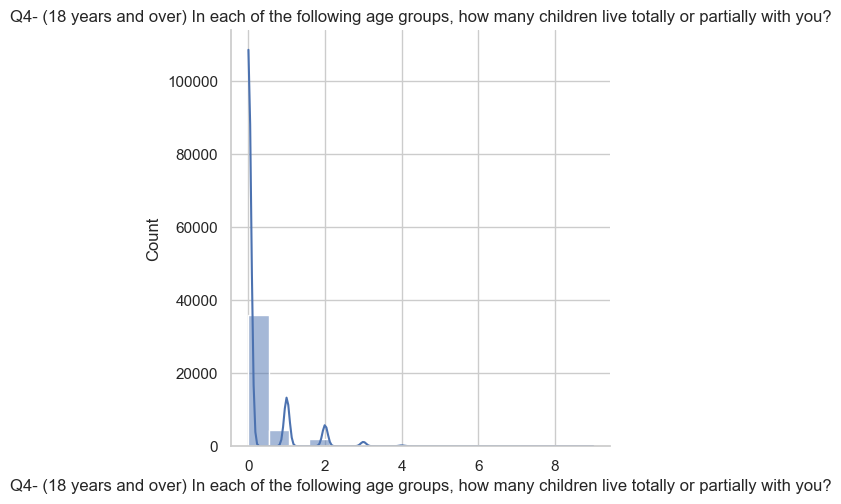

<Figure size 600x600 with 0 Axes>

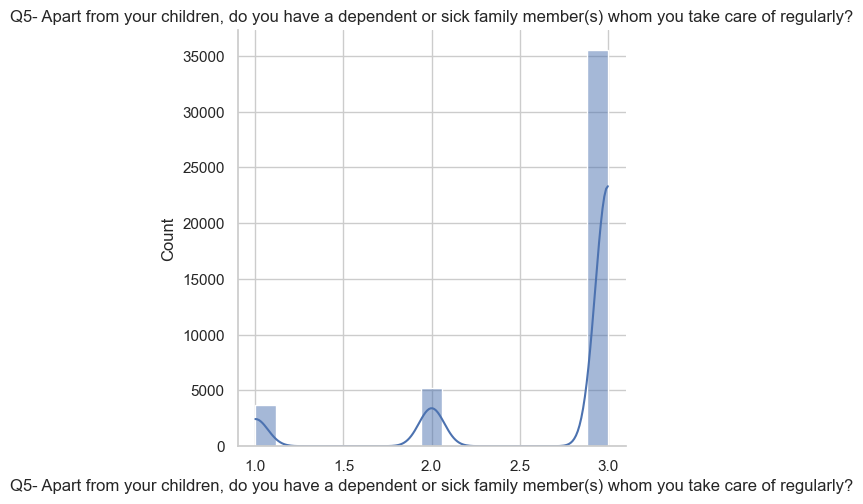

<Figure size 600x600 with 0 Axes>

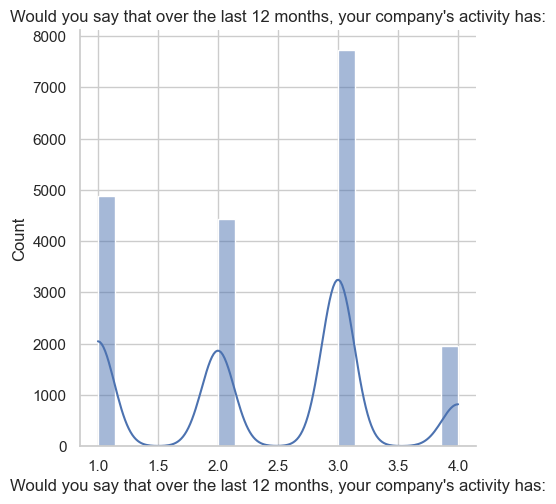

<Figure size 600x600 with 0 Axes>

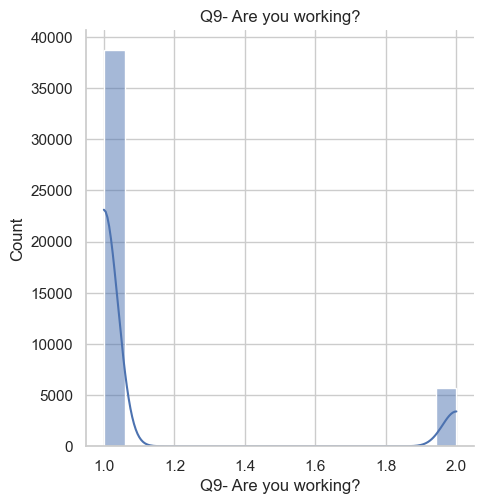

<Figure size 600x600 with 0 Axes>

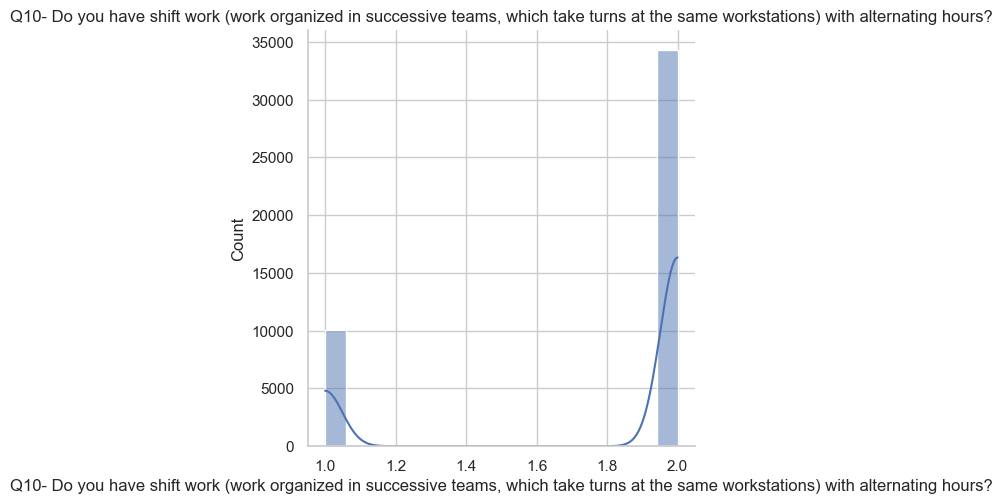

<Figure size 600x600 with 0 Axes>

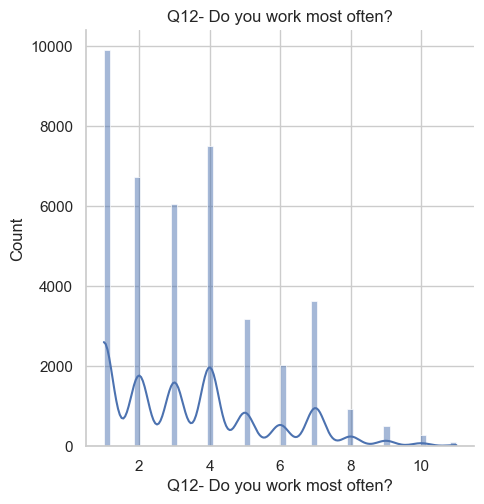

<Figure size 600x600 with 0 Axes>

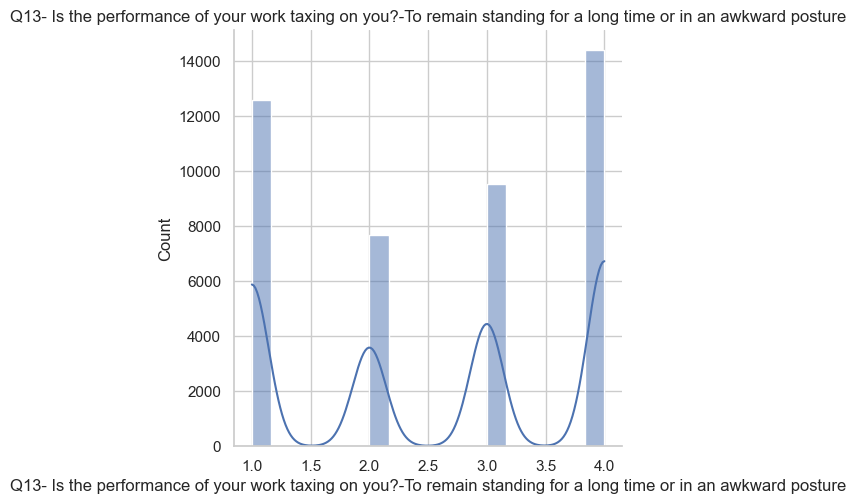

<Figure size 600x600 with 0 Axes>

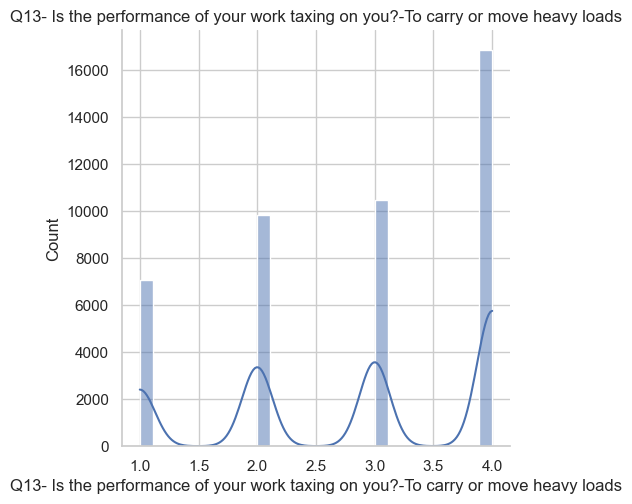

<Figure size 600x600 with 0 Axes>

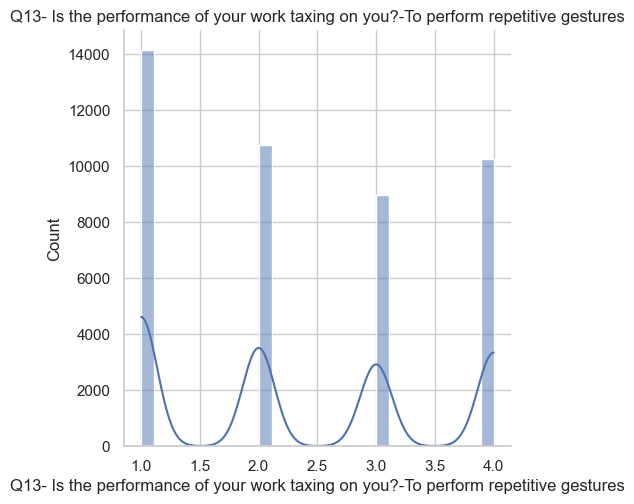

<Figure size 600x600 with 0 Axes>

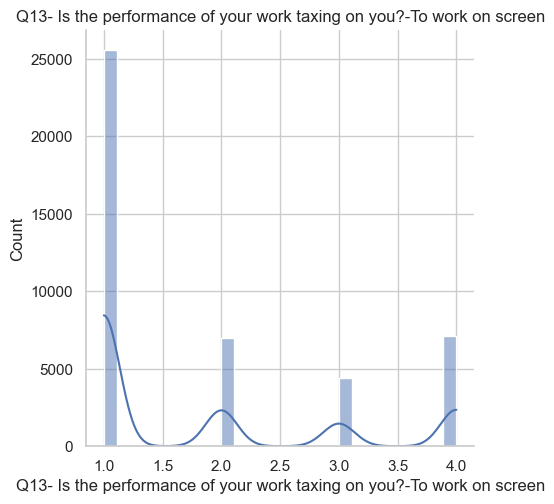

<Figure size 600x600 with 0 Axes>

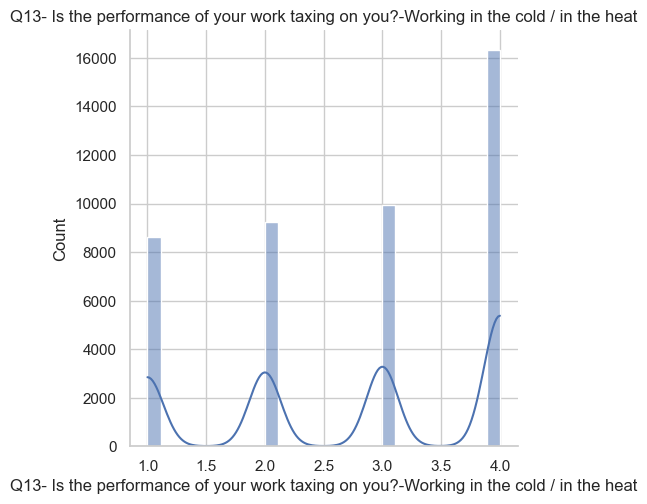

<Figure size 600x600 with 0 Axes>

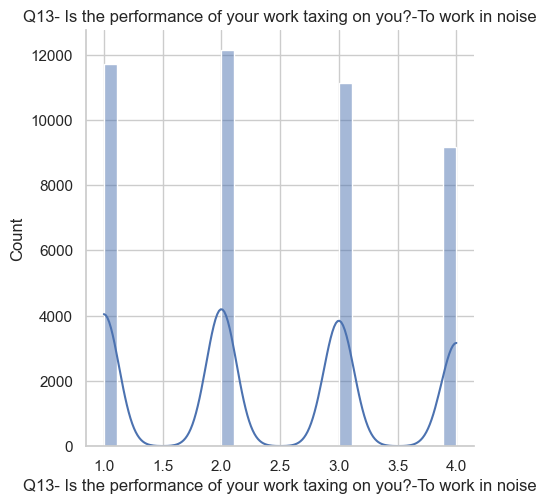

<Figure size 600x600 with 0 Axes>

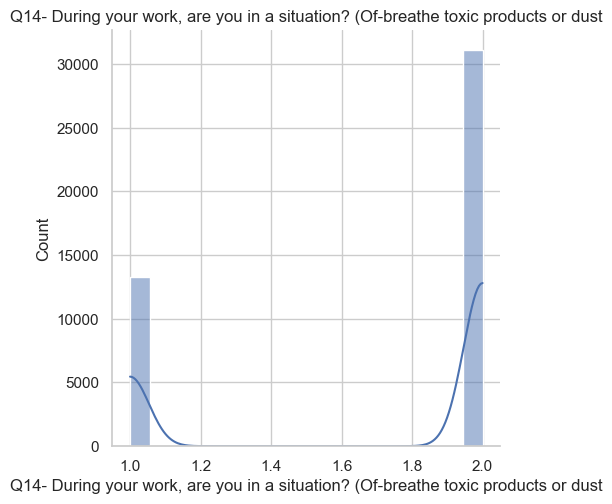

<Figure size 600x600 with 0 Axes>

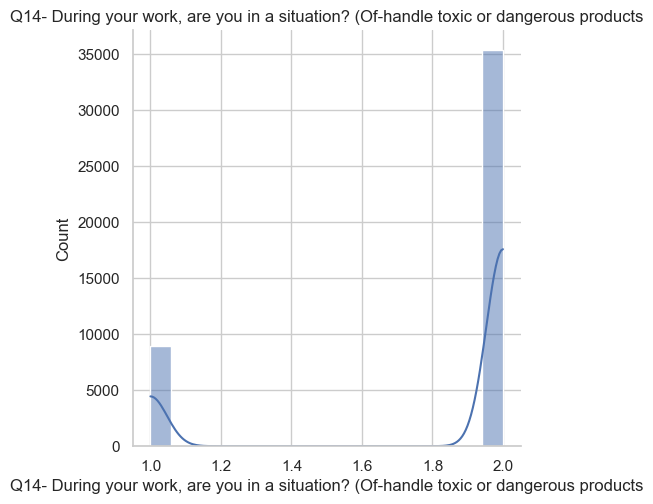

<Figure size 600x600 with 0 Axes>

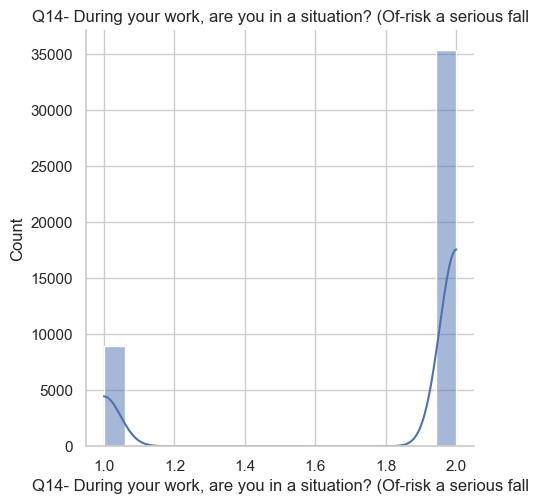

<Figure size 600x600 with 0 Axes>

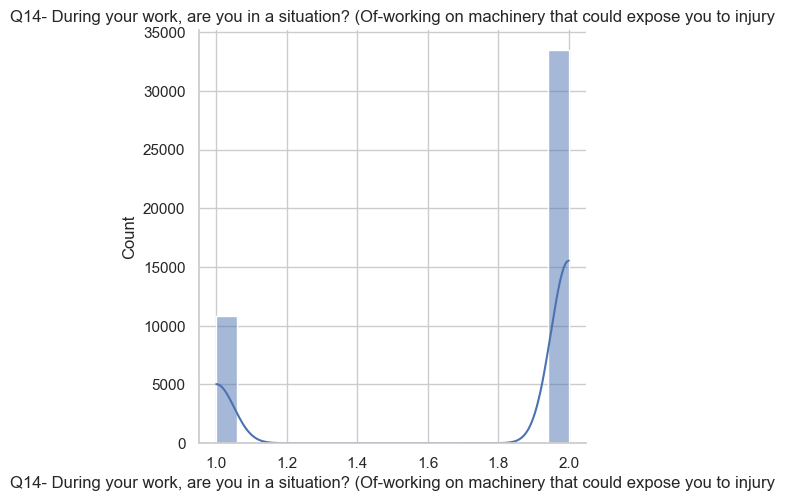

<Figure size 600x600 with 0 Axes>

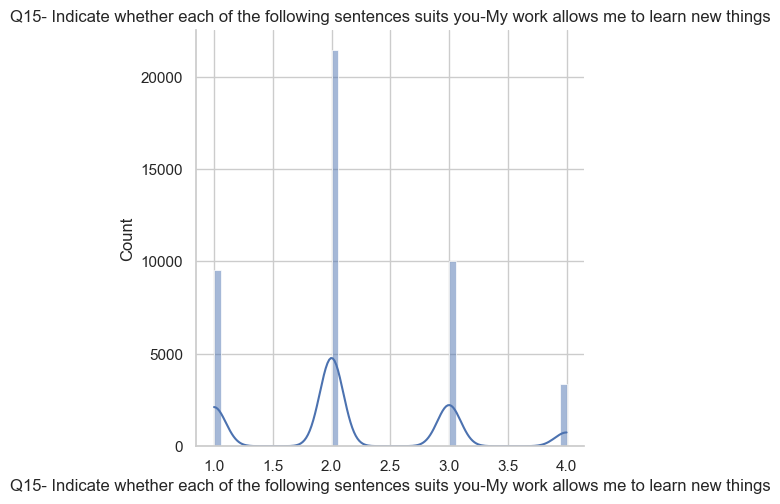

<Figure size 600x600 with 0 Axes>

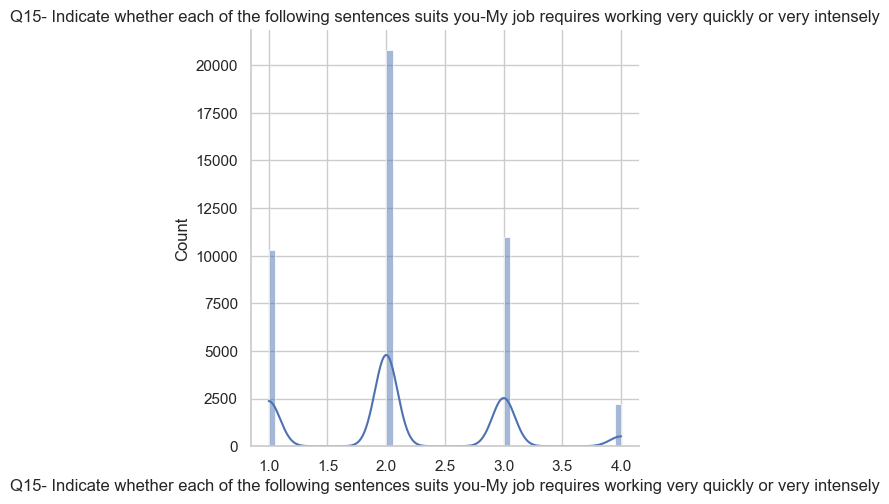

<Figure size 600x600 with 0 Axes>

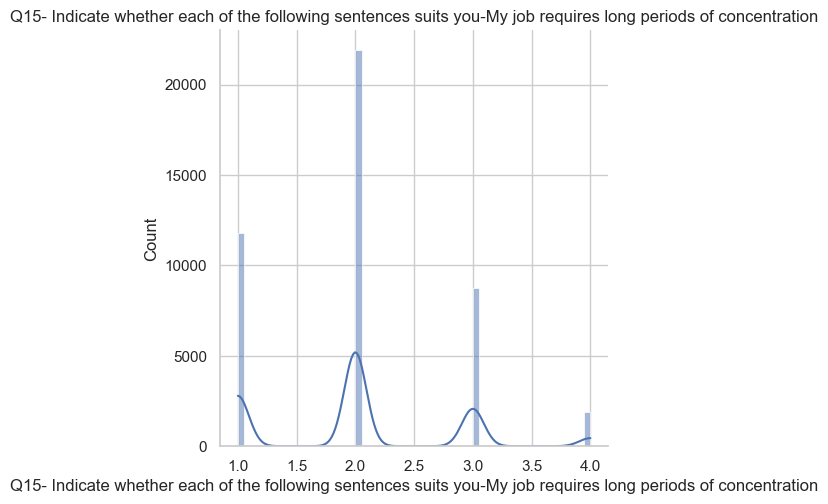

<Figure size 600x600 with 0 Axes>

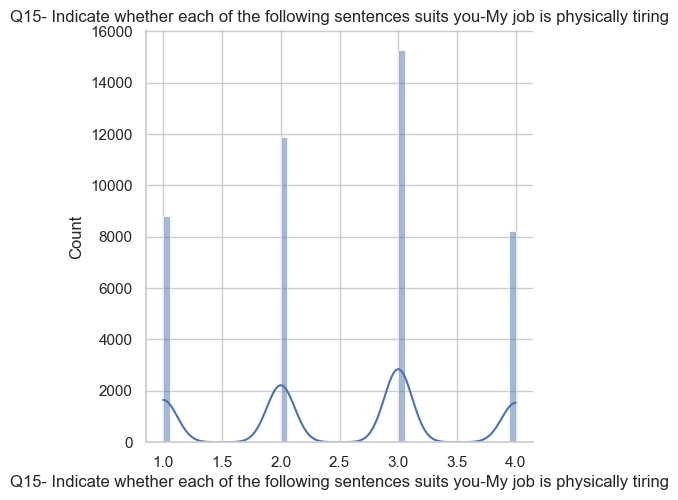

<Figure size 600x600 with 0 Axes>

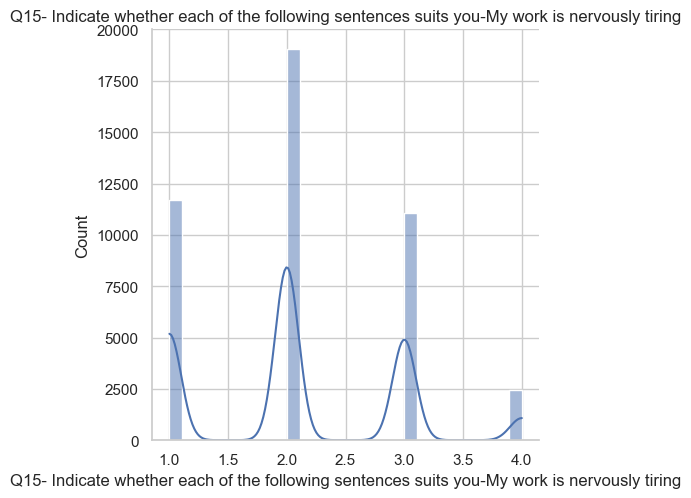

<Figure size 600x600 with 0 Axes>

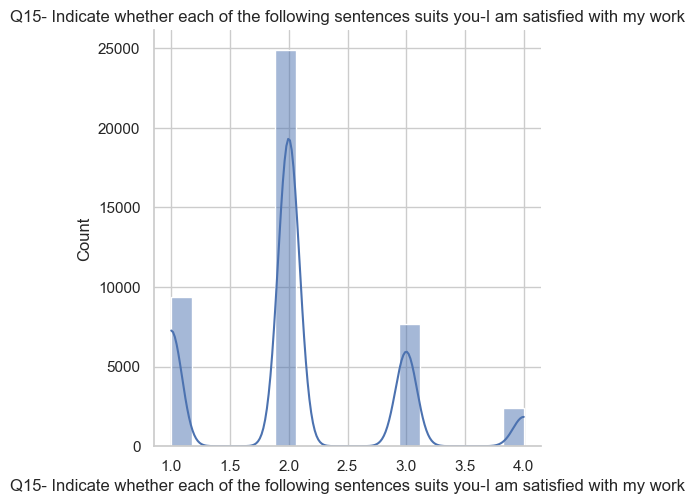

<Figure size 600x600 with 0 Axes>

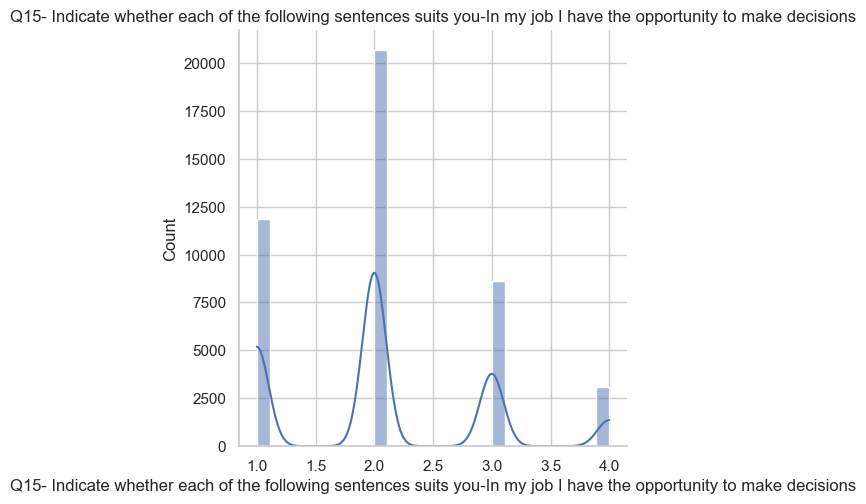

<Figure size 600x600 with 0 Axes>

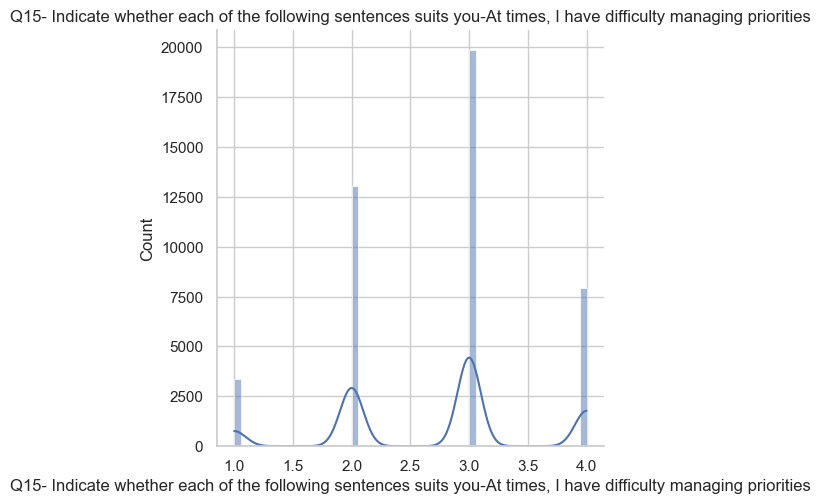

<Figure size 600x600 with 0 Axes>

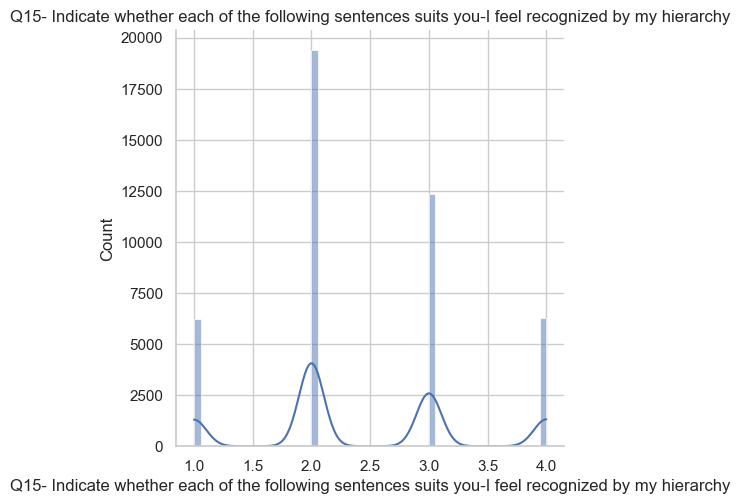

<Figure size 600x600 with 0 Axes>

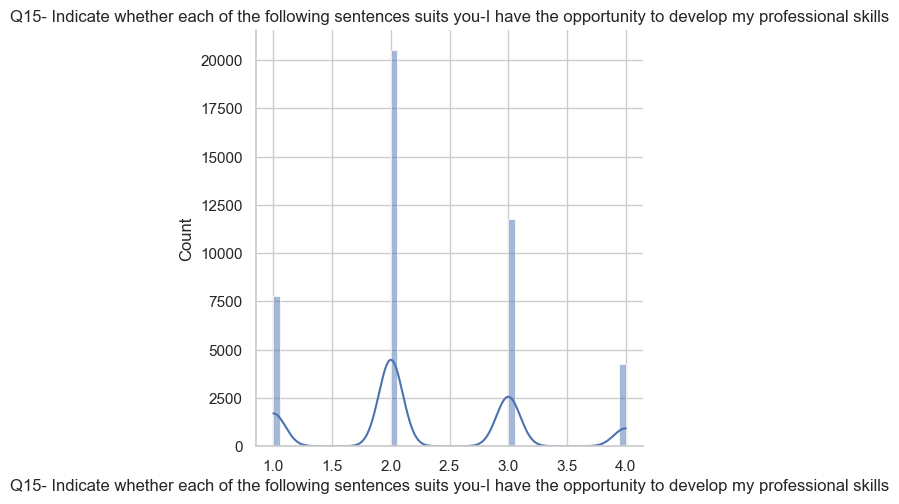

<Figure size 600x600 with 0 Axes>

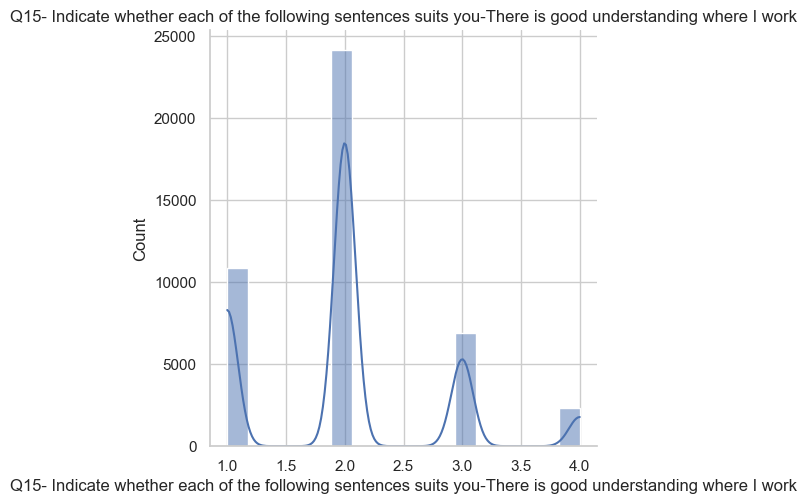

<Figure size 600x600 with 0 Axes>

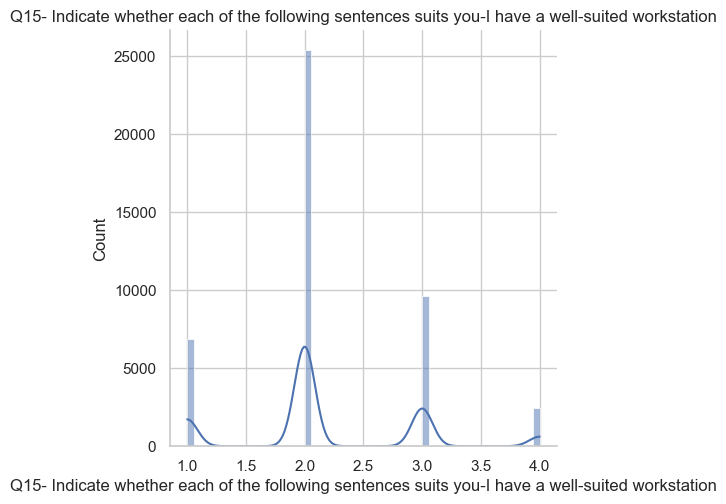

<Figure size 600x600 with 0 Axes>

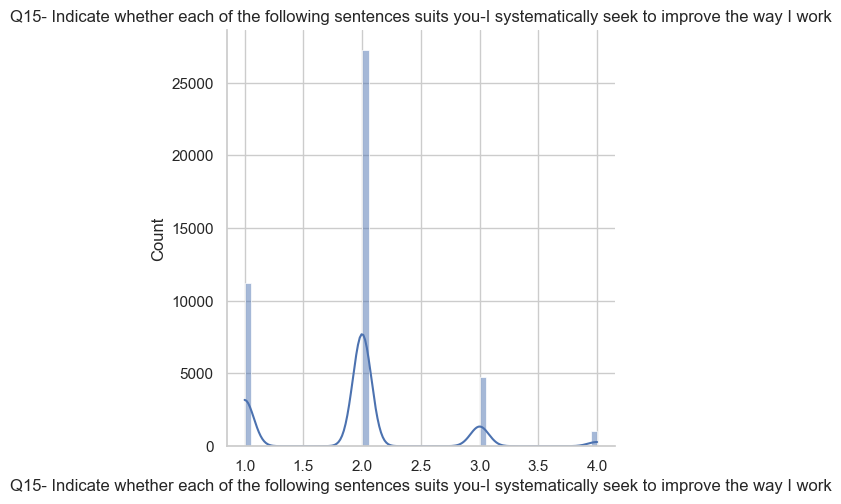

<Figure size 600x600 with 0 Axes>

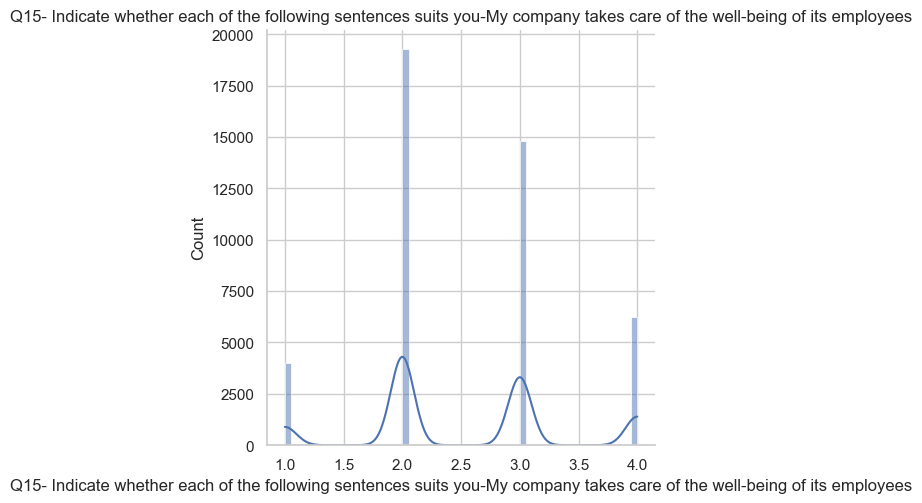

<Figure size 600x600 with 0 Axes>

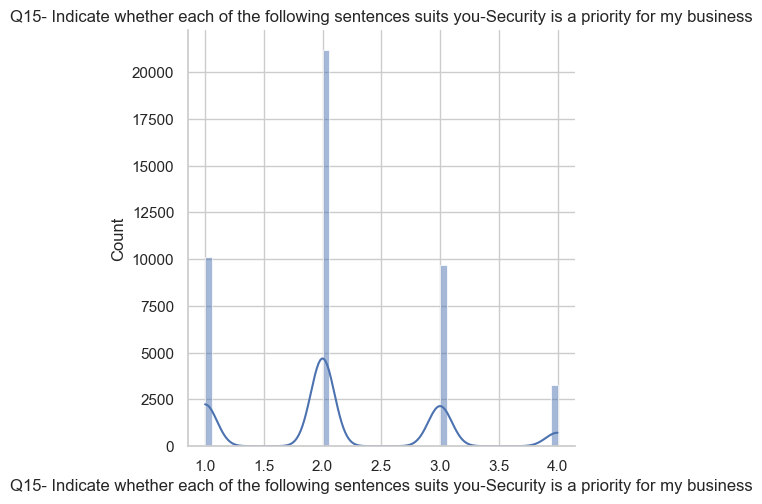

<Figure size 600x600 with 0 Axes>

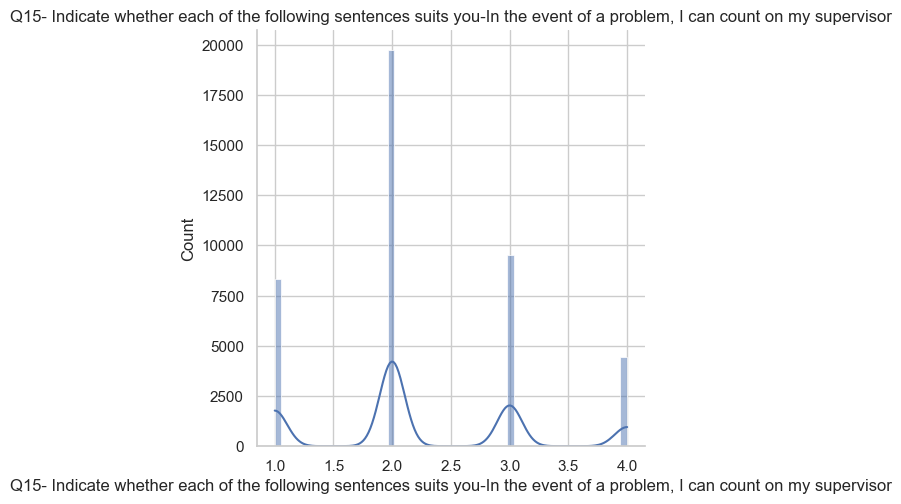

<Figure size 600x600 with 0 Axes>

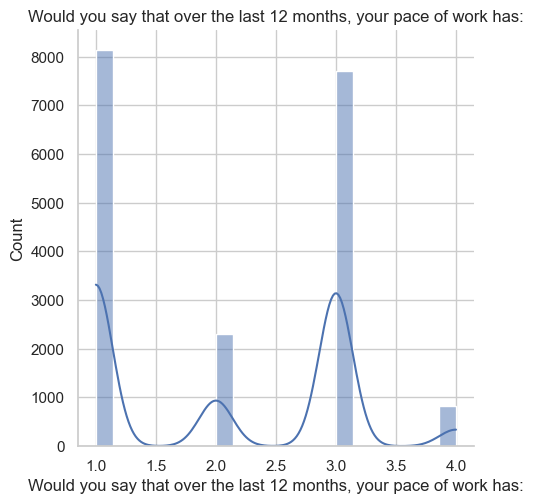

<Figure size 600x600 with 0 Axes>

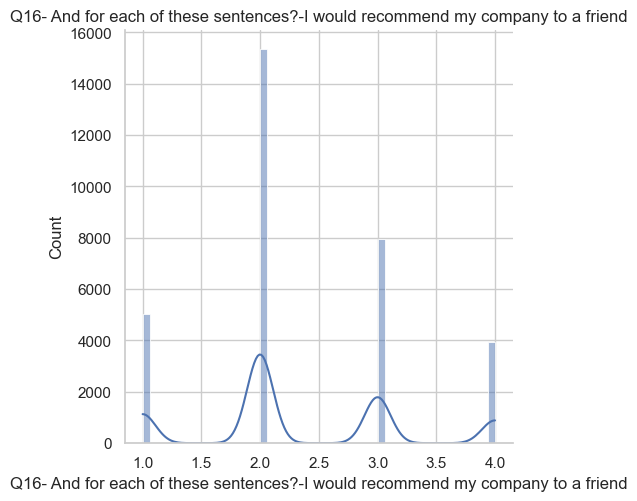

<Figure size 600x600 with 0 Axes>

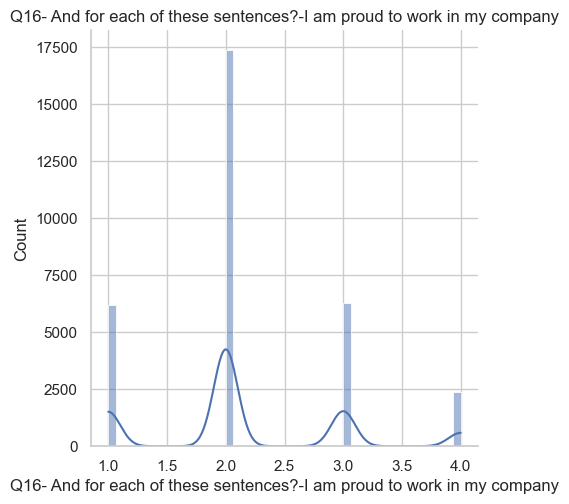

<Figure size 600x600 with 0 Axes>

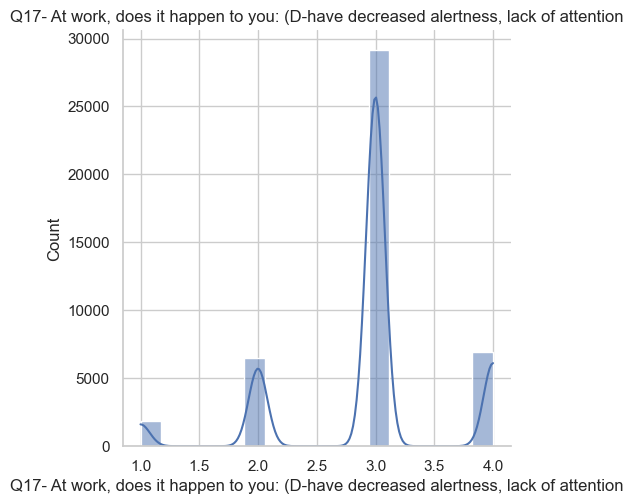

<Figure size 600x600 with 0 Axes>

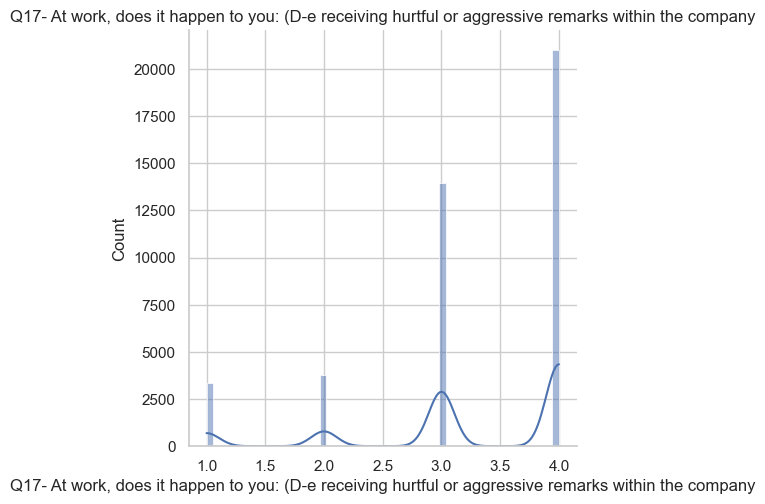

<Figure size 600x600 with 0 Axes>

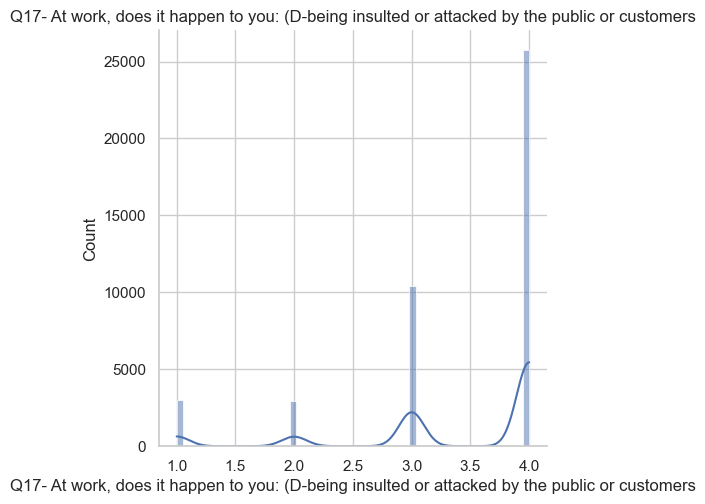

<Figure size 600x600 with 0 Axes>

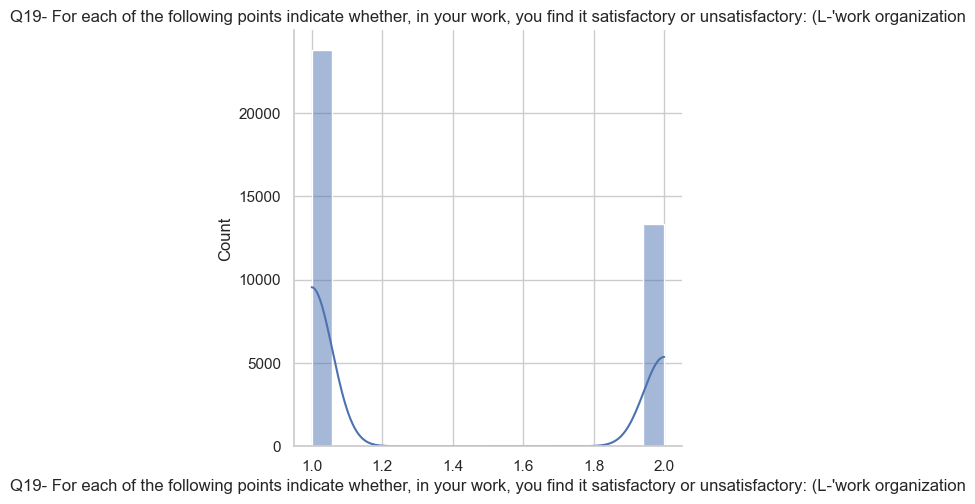

<Figure size 600x600 with 0 Axes>

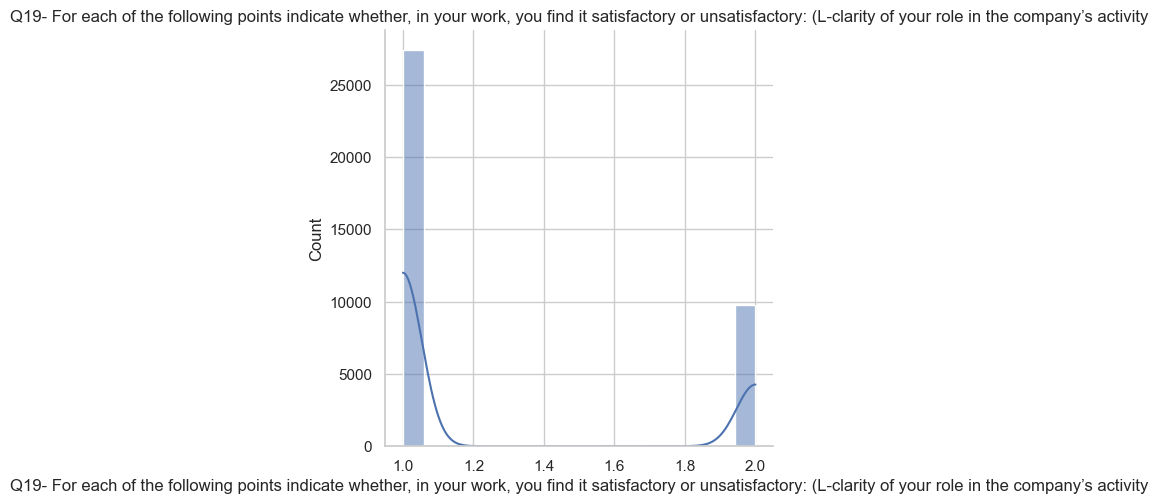

<Figure size 600x600 with 0 Axes>

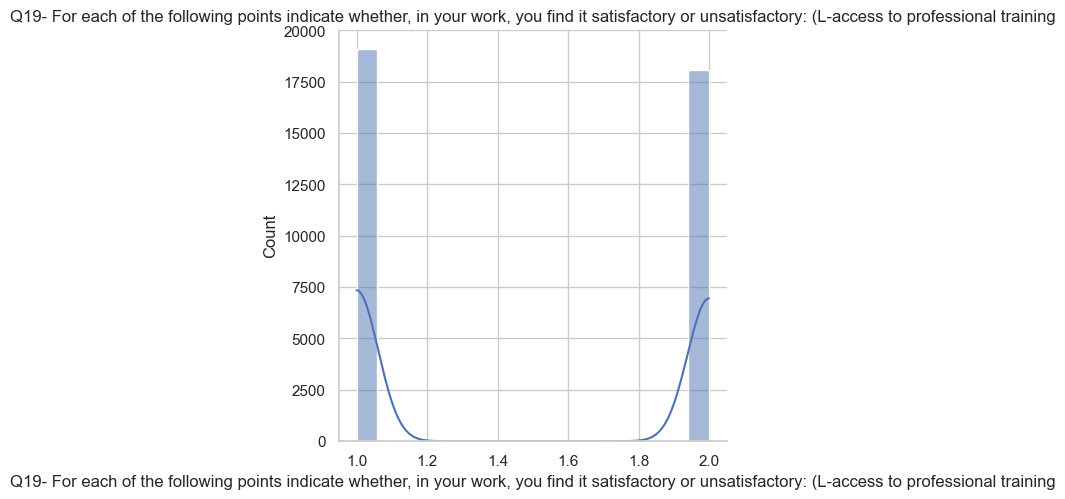

<Figure size 600x600 with 0 Axes>

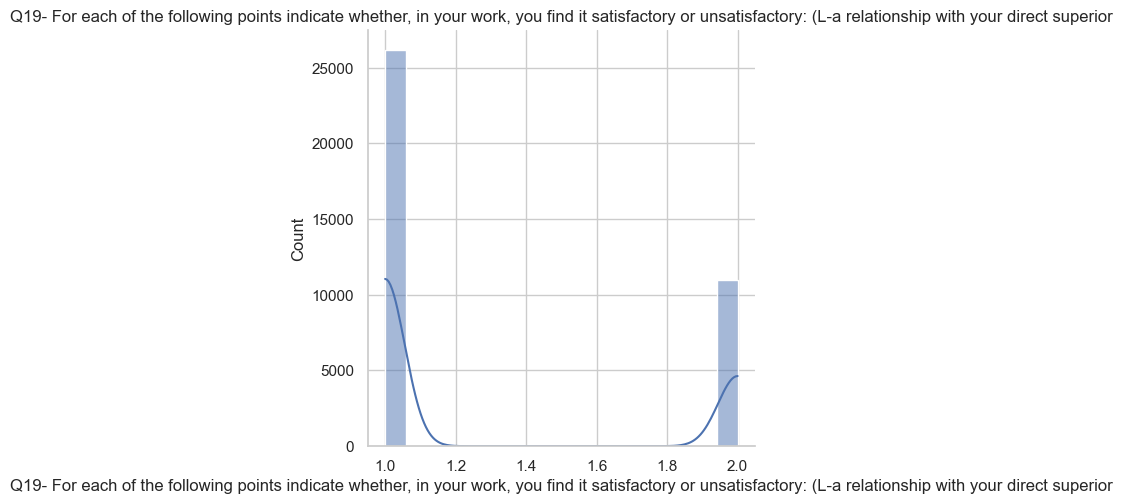

<Figure size 600x600 with 0 Axes>

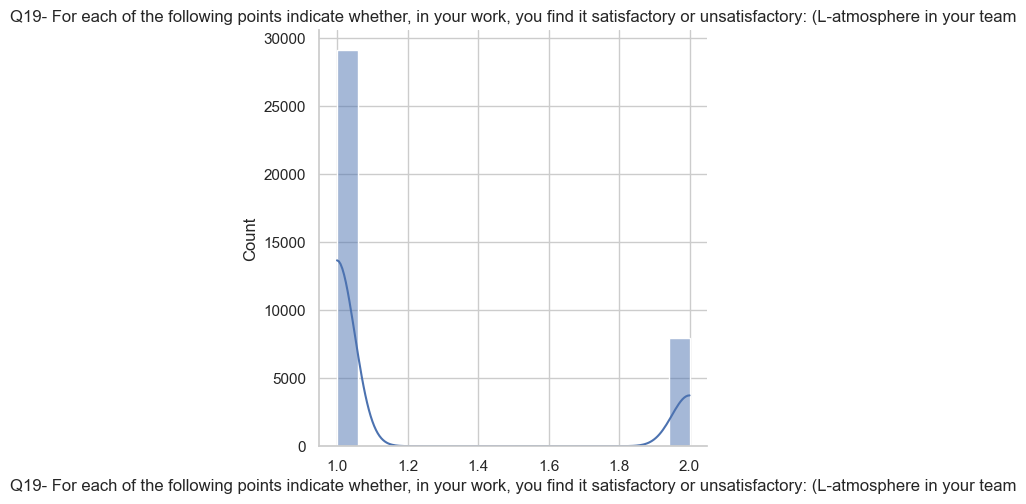

<Figure size 600x600 with 0 Axes>

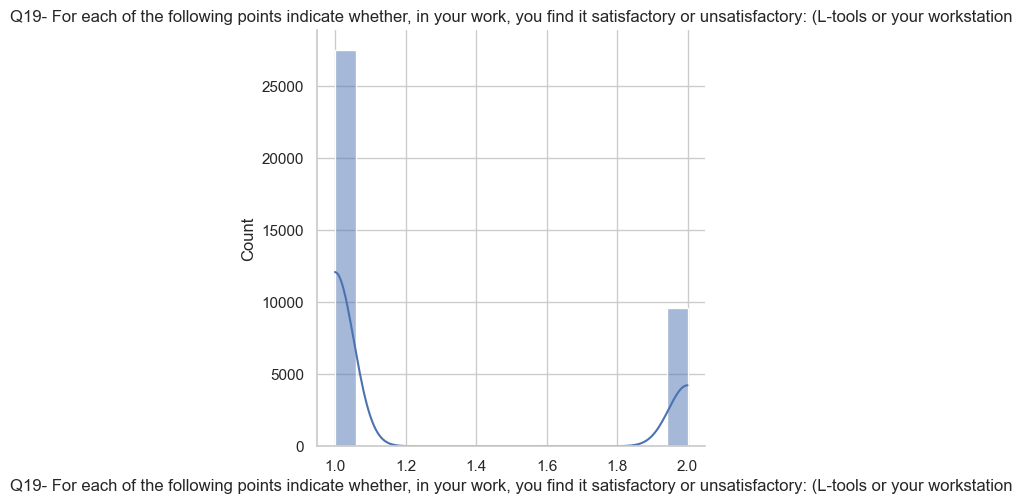

<Figure size 600x600 with 0 Axes>

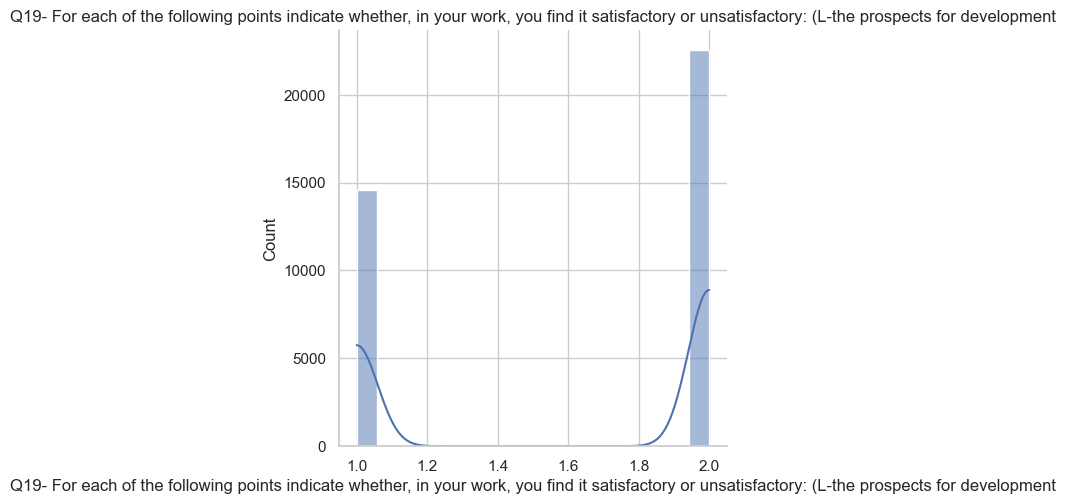

<Figure size 600x600 with 0 Axes>

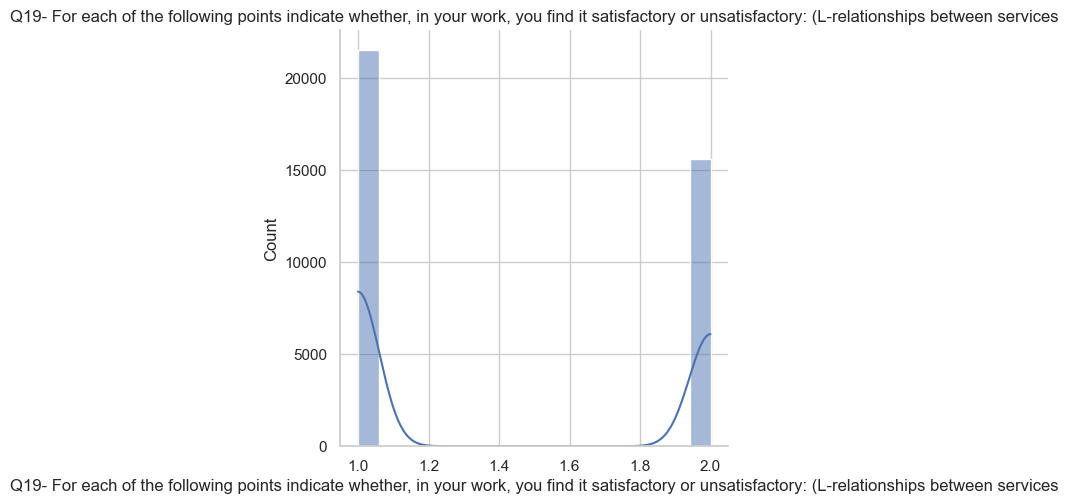

<Figure size 600x600 with 0 Axes>

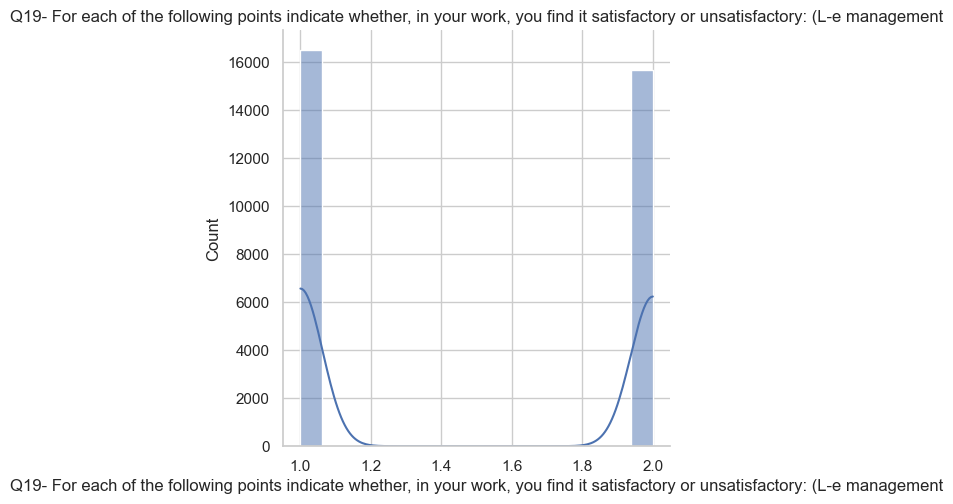

<Figure size 600x600 with 0 Axes>

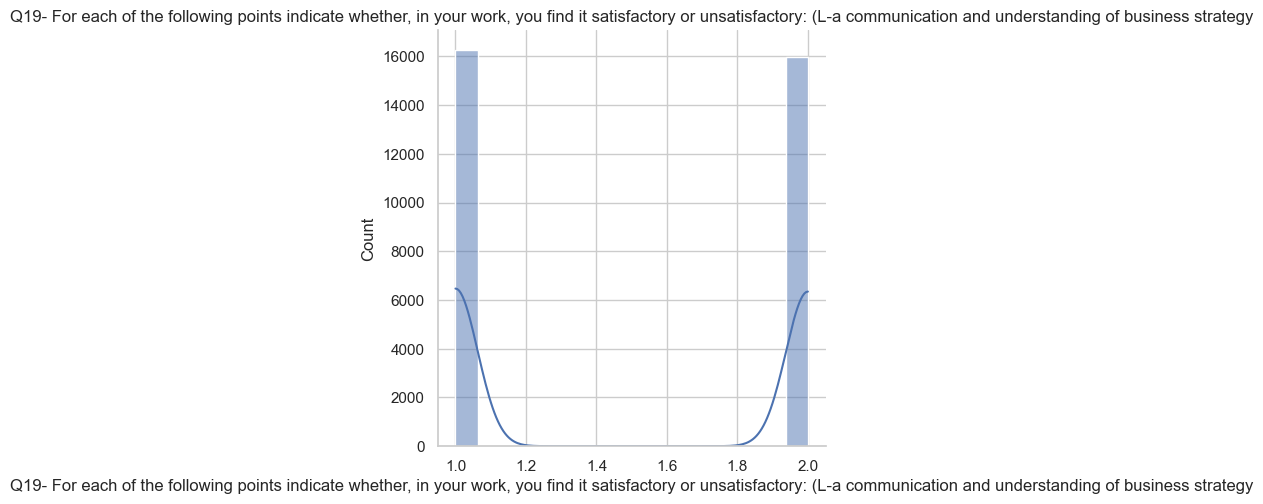

<Figure size 600x600 with 0 Axes>

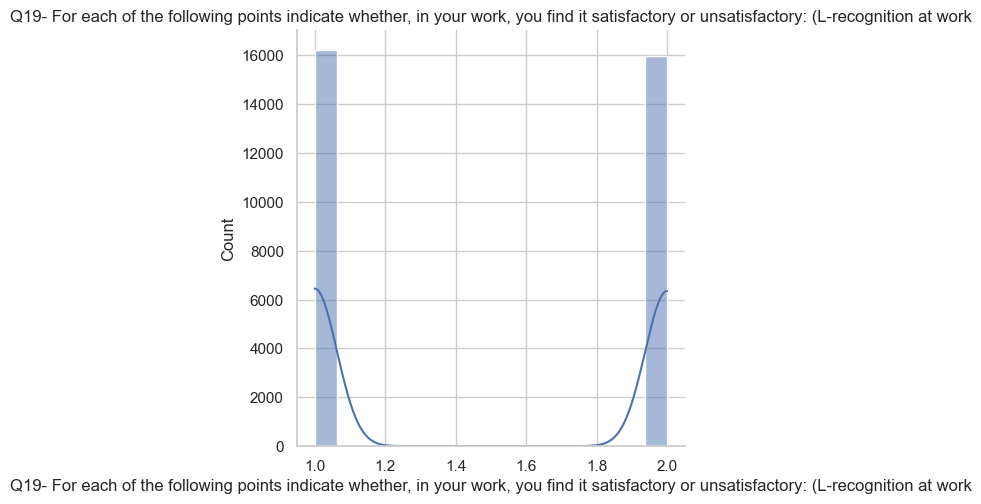

<Figure size 600x600 with 0 Axes>

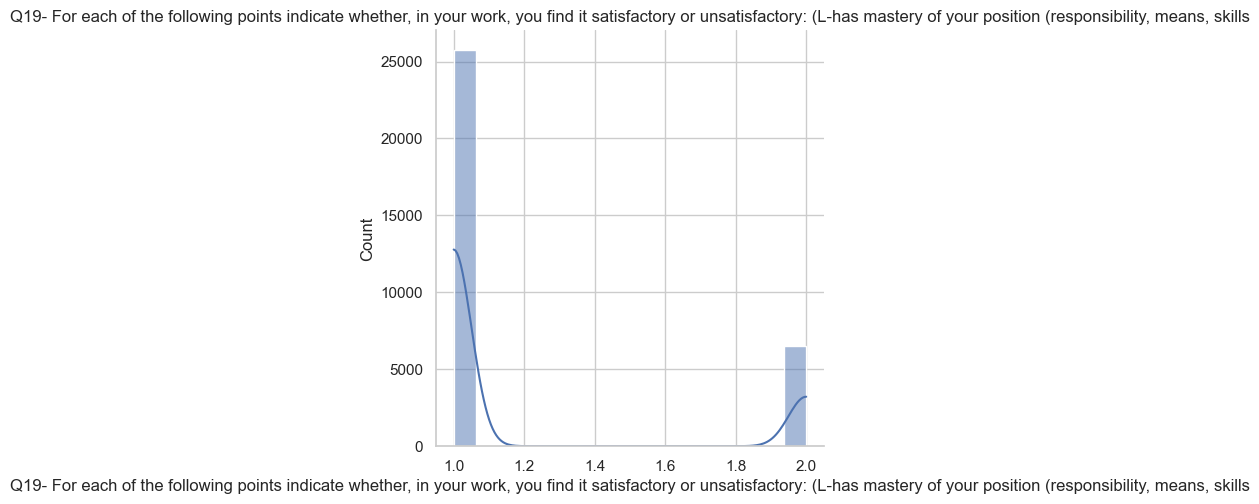

<Figure size 600x600 with 0 Axes>

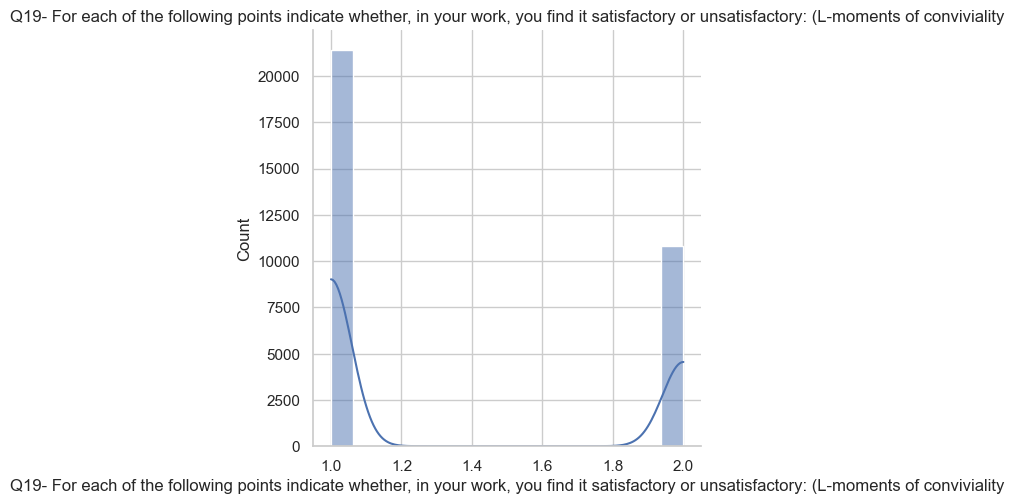

<Figure size 600x600 with 0 Axes>

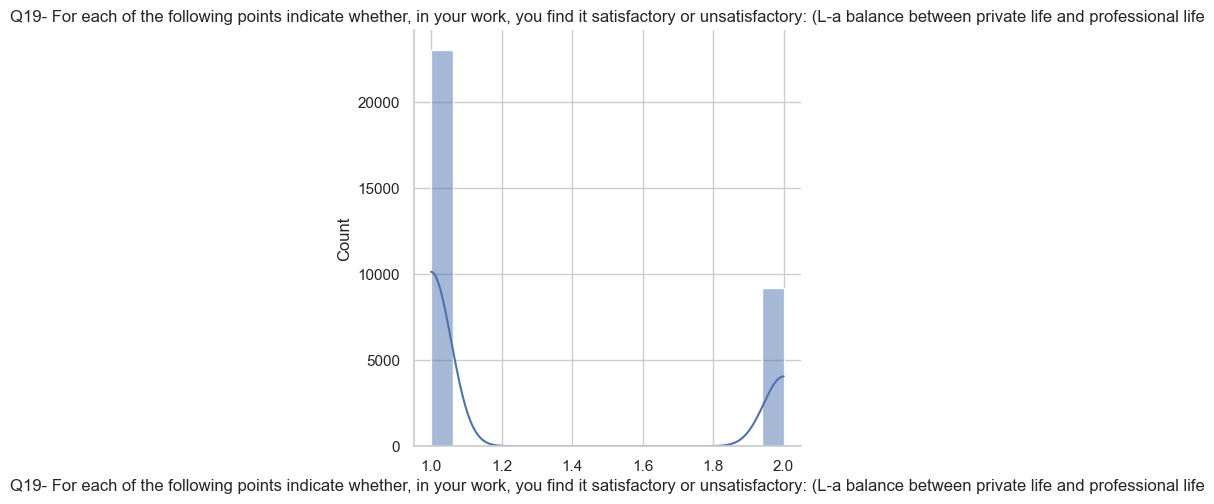

<Figure size 600x600 with 0 Axes>

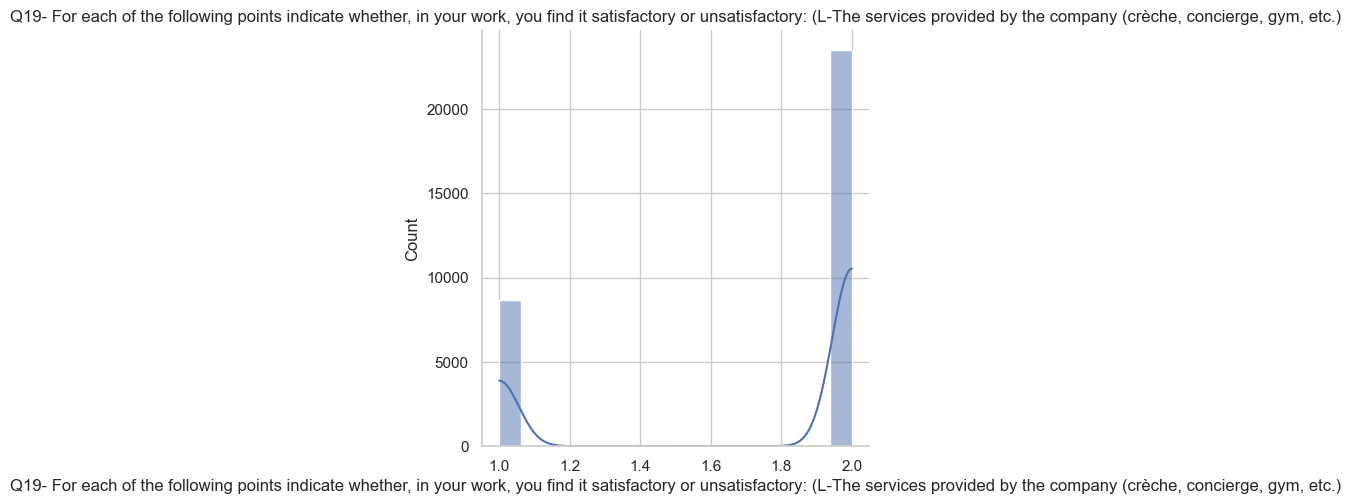

<Figure size 600x600 with 0 Axes>

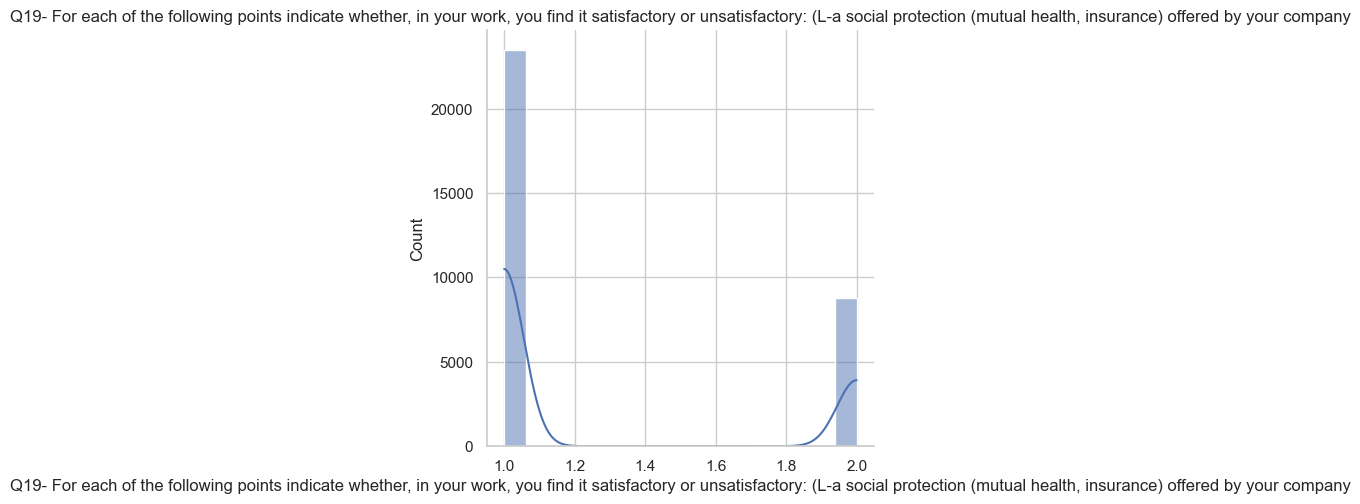

<Figure size 600x600 with 0 Axes>

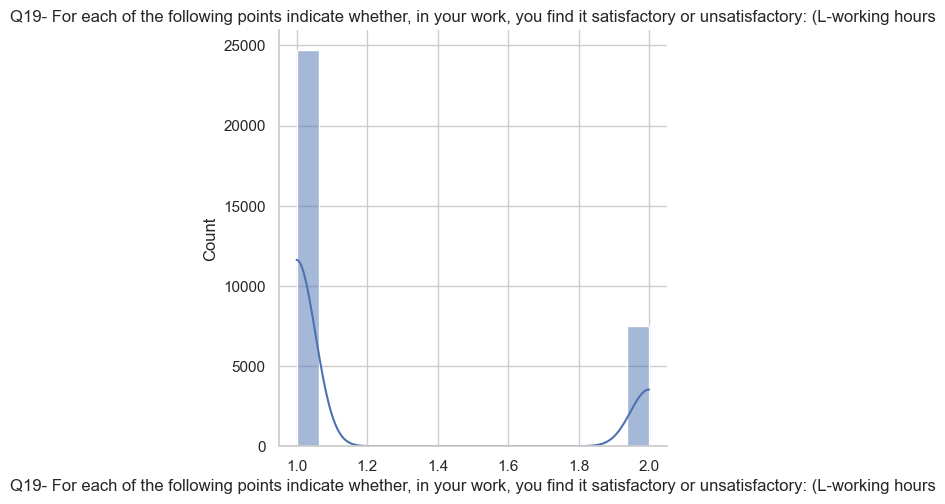

<Figure size 600x600 with 0 Axes>

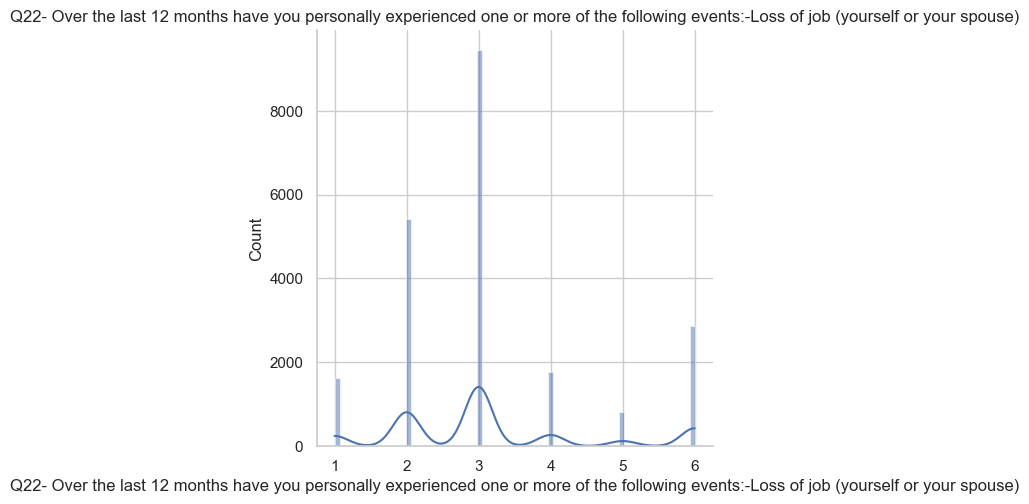

<Figure size 600x600 with 0 Axes>

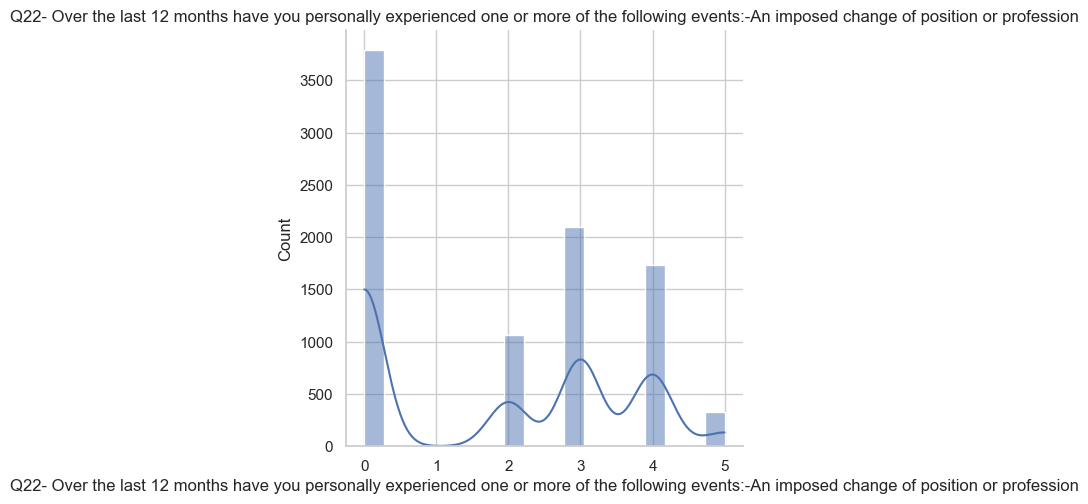

<Figure size 600x600 with 0 Axes>

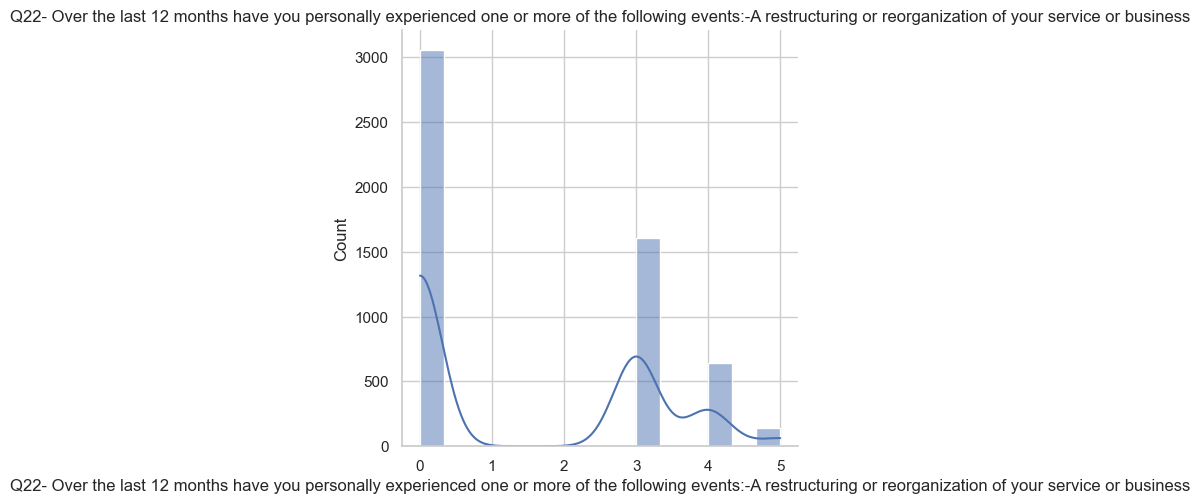

<Figure size 600x600 with 0 Axes>

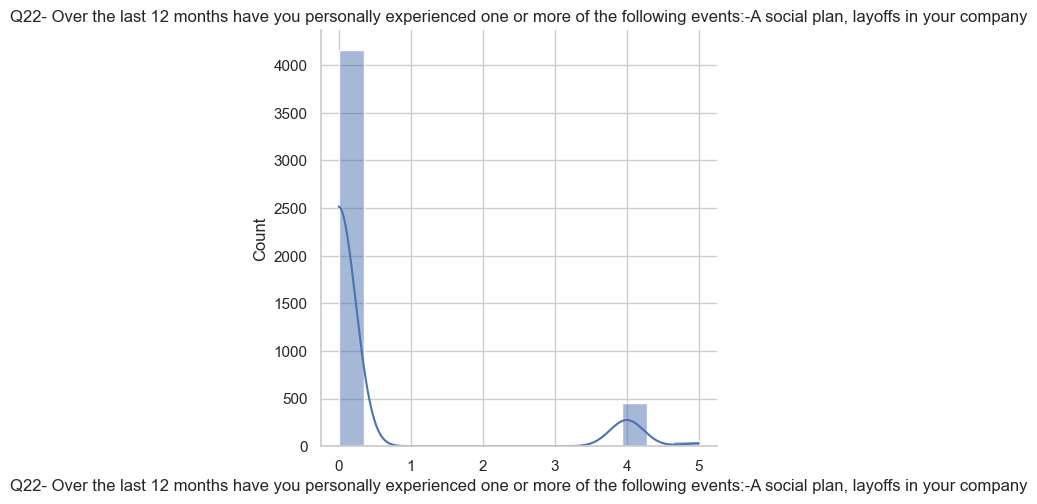

<Figure size 600x600 with 0 Axes>

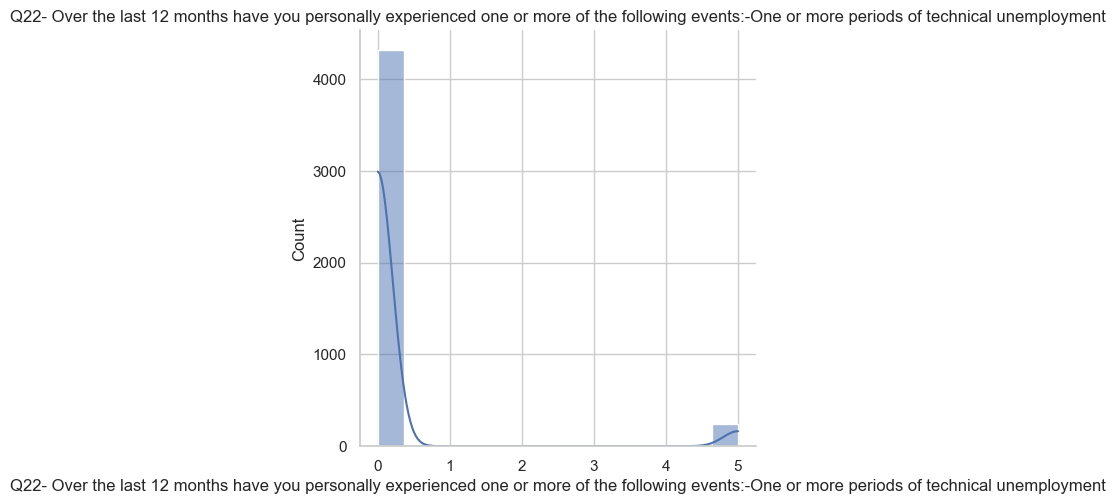

<Figure size 600x600 with 0 Axes>

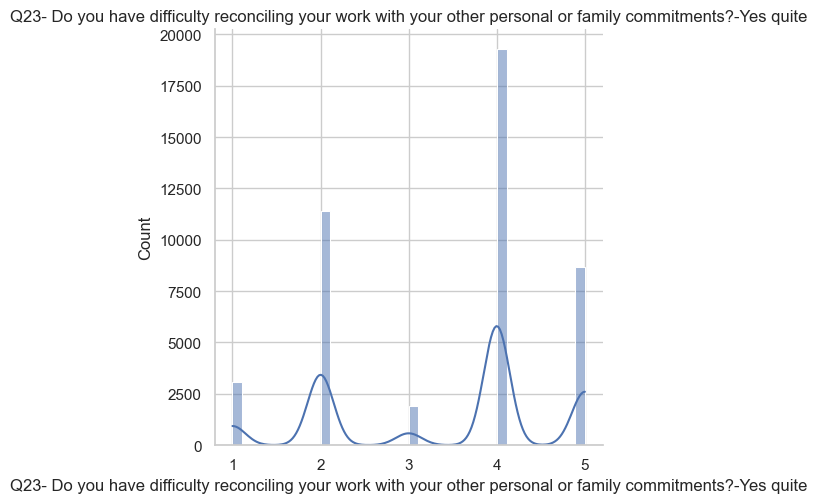

<Figure size 600x600 with 0 Axes>

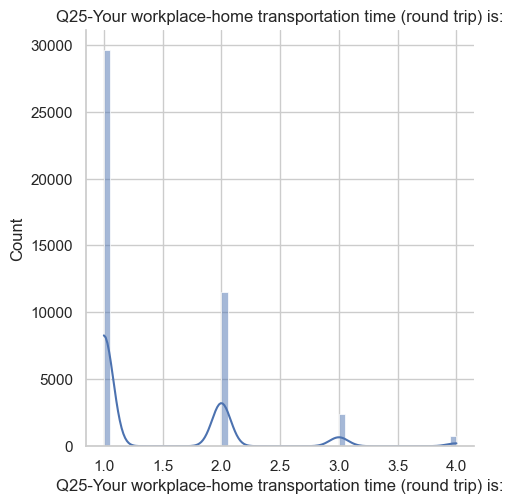

<Figure size 600x600 with 0 Axes>

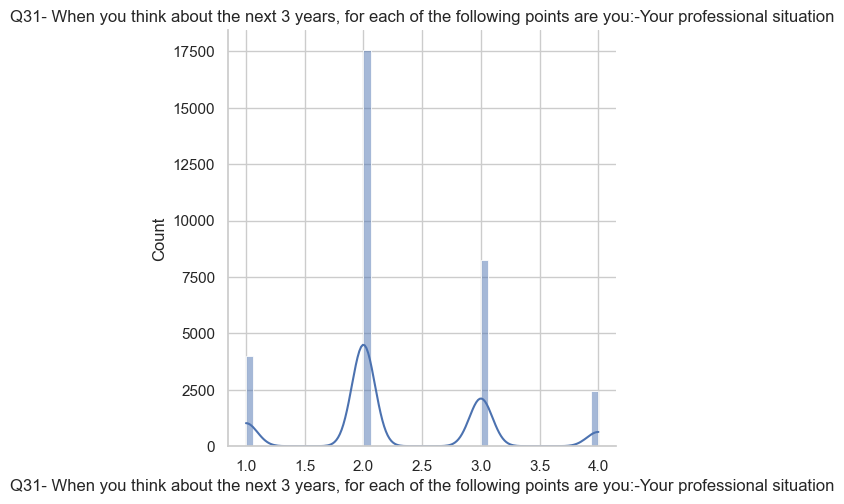

<Figure size 600x600 with 0 Axes>

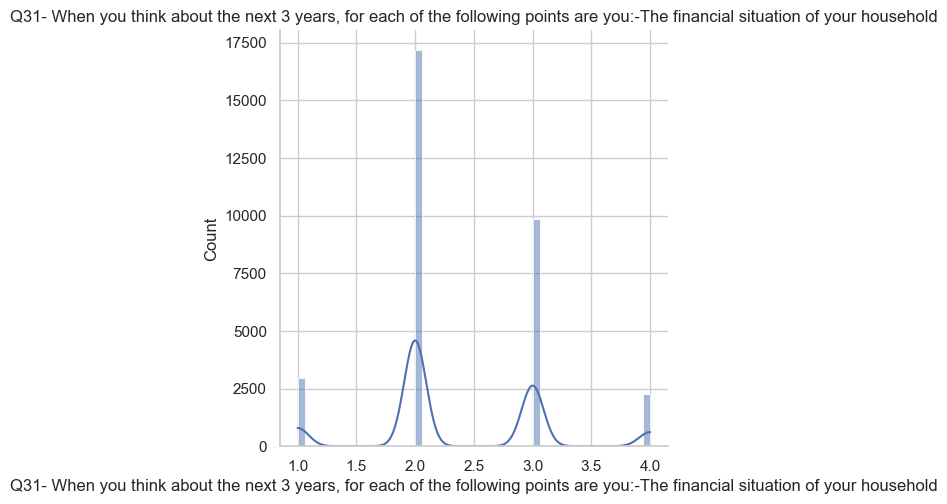

<Figure size 600x600 with 0 Axes>

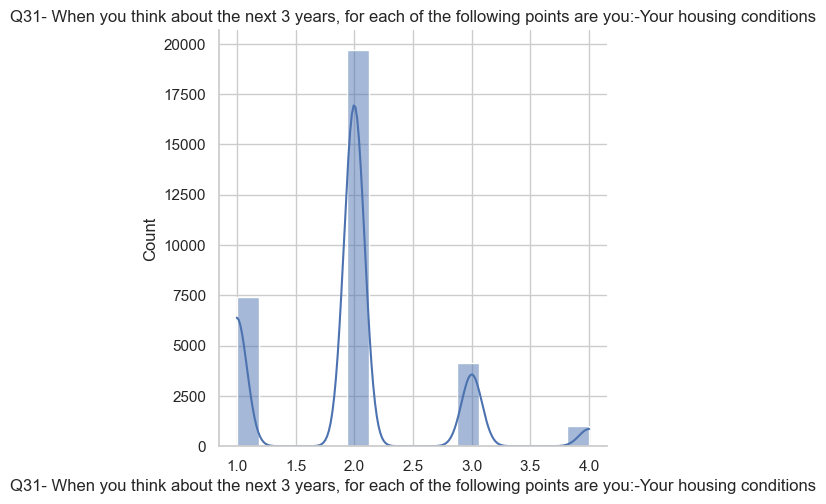

<Figure size 600x600 with 0 Axes>

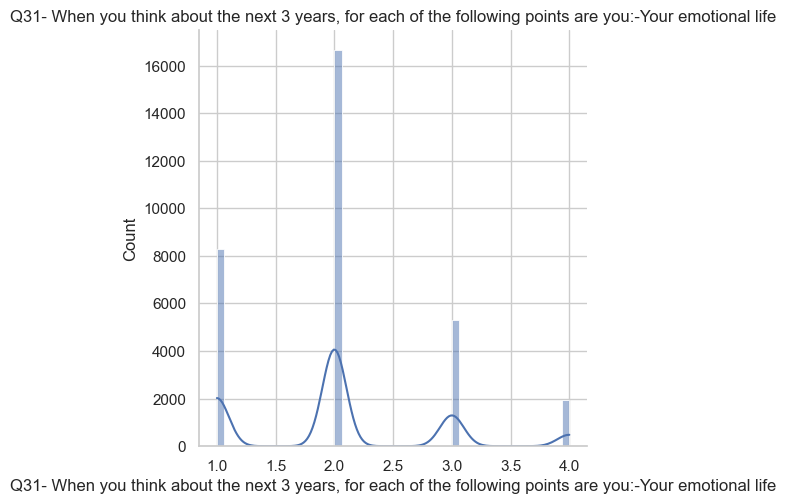

<Figure size 600x600 with 0 Axes>

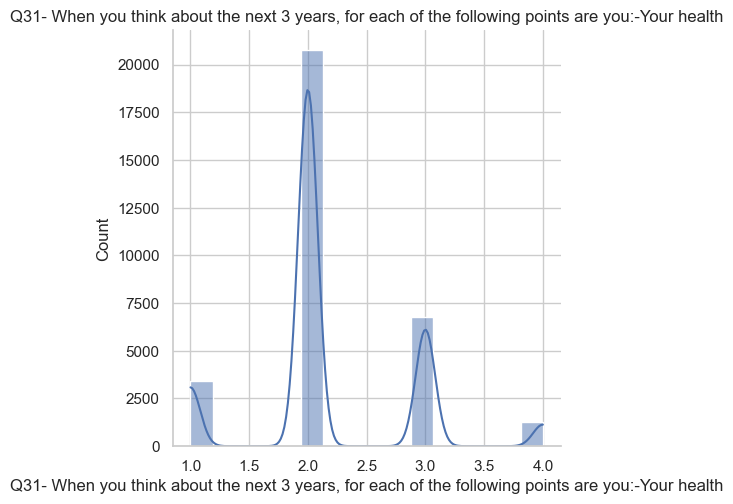

<Figure size 600x600 with 0 Axes>

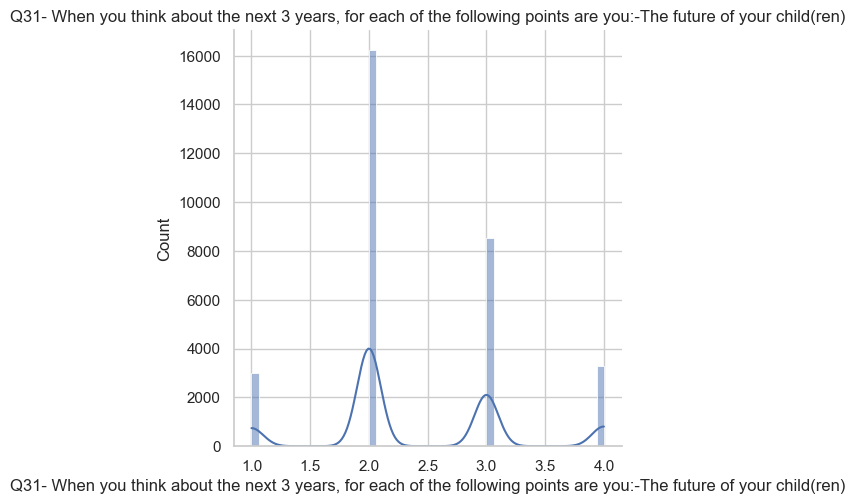

<Figure size 600x600 with 0 Axes>

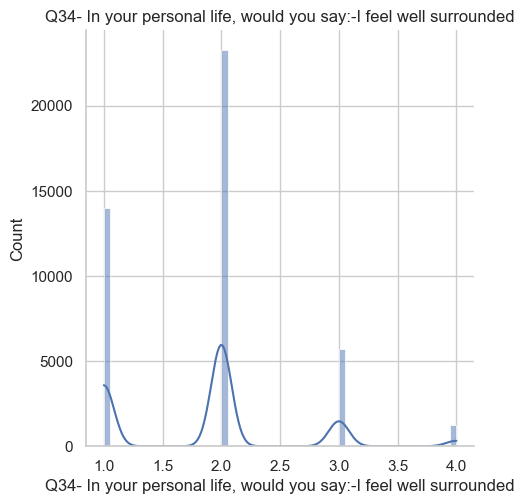

<Figure size 600x600 with 0 Axes>

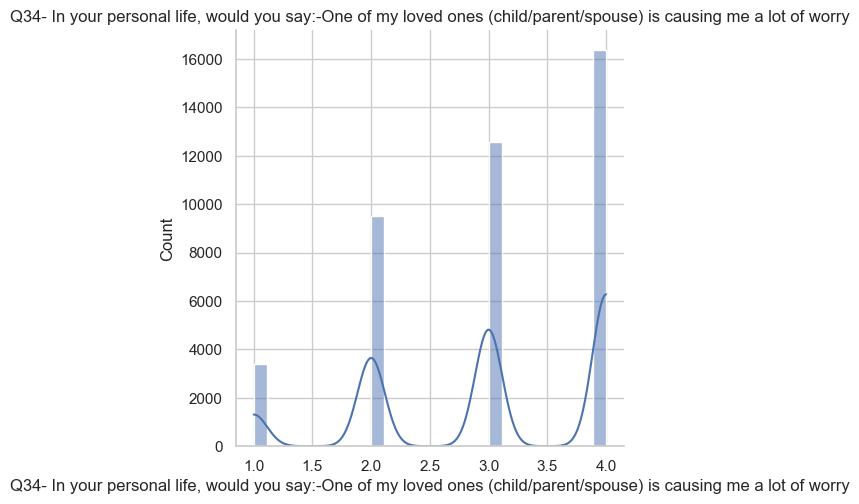

<Figure size 600x600 with 0 Axes>

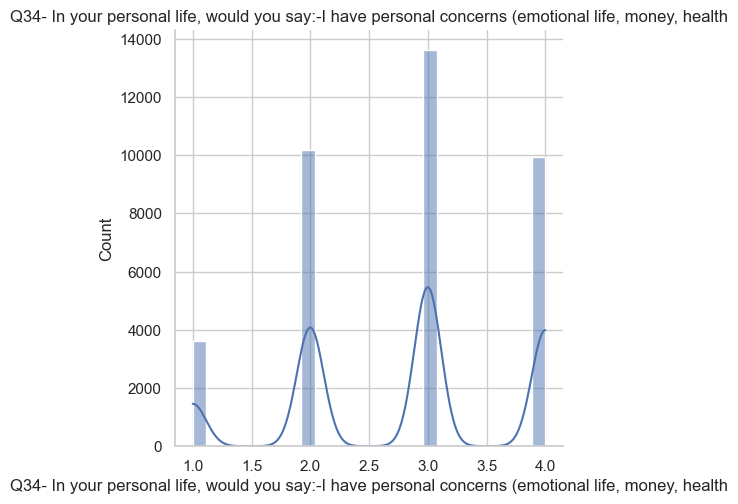

<Figure size 600x600 with 0 Axes>

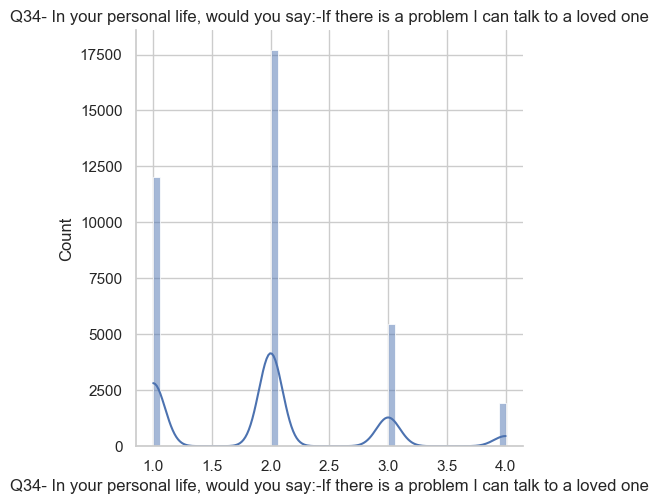

<Figure size 600x600 with 0 Axes>

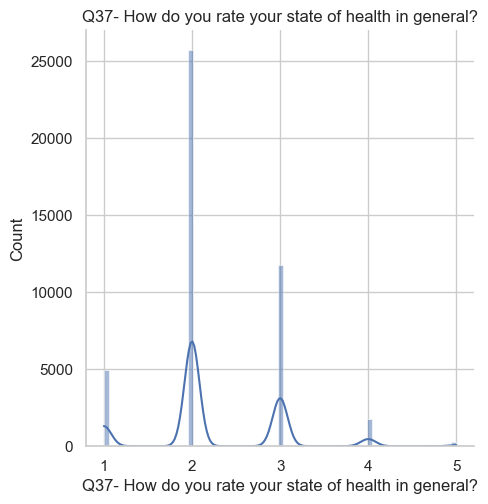

<Figure size 600x600 with 0 Axes>

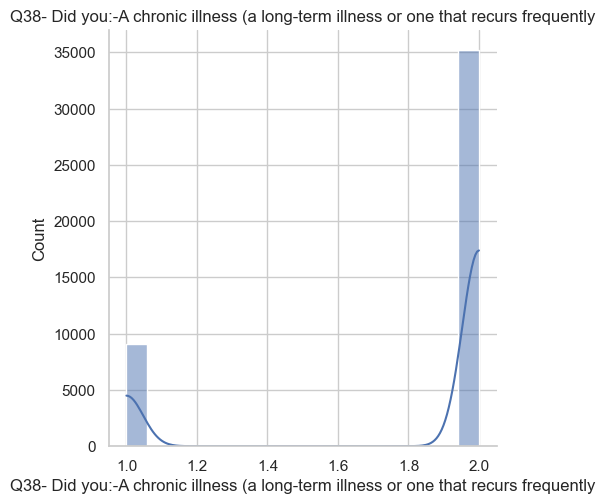

<Figure size 600x600 with 0 Axes>

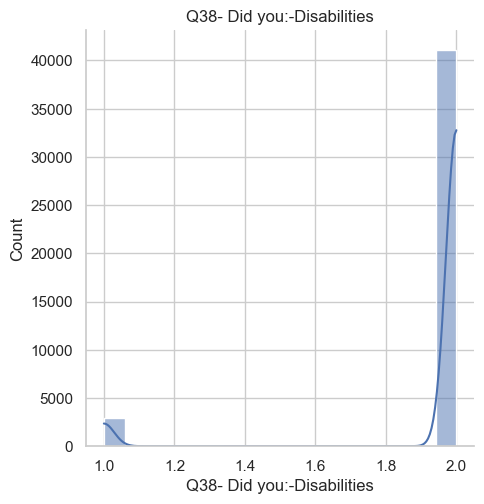

<Figure size 600x600 with 0 Axes>

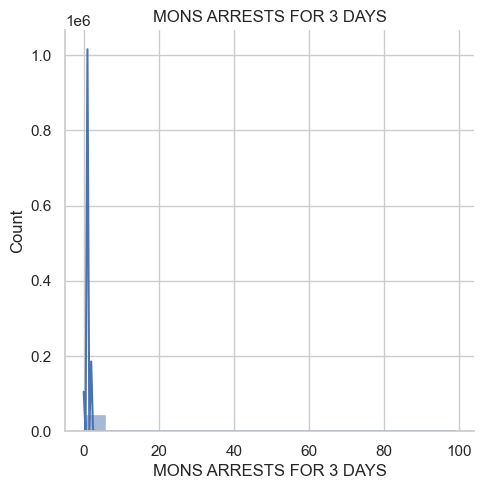

<Figure size 600x600 with 0 Axes>

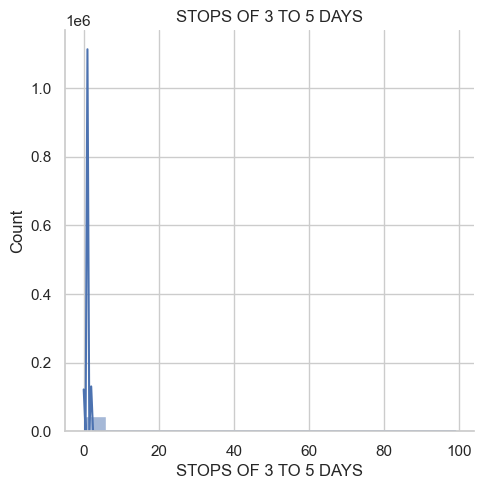

<Figure size 600x600 with 0 Axes>

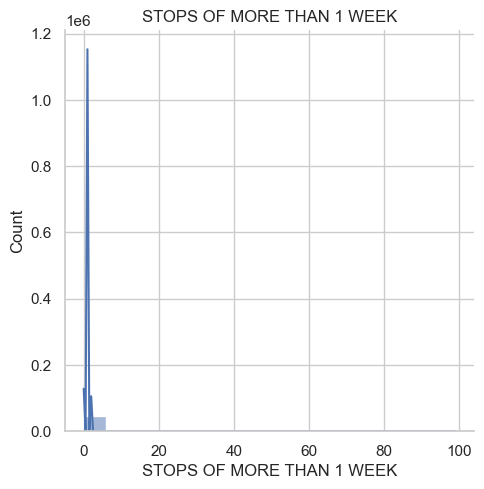

<Figure size 600x600 with 0 Axes>

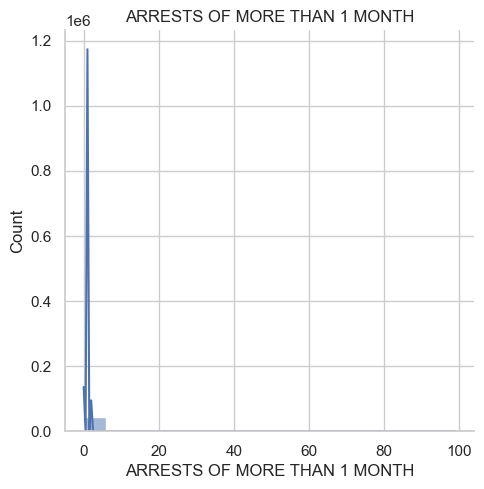

<Figure size 600x600 with 0 Axes>

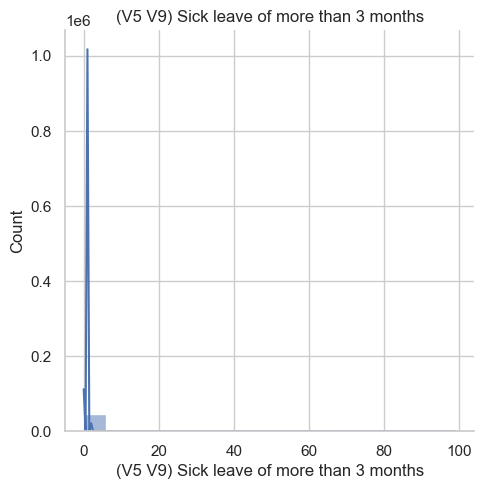

<Figure size 600x600 with 0 Axes>

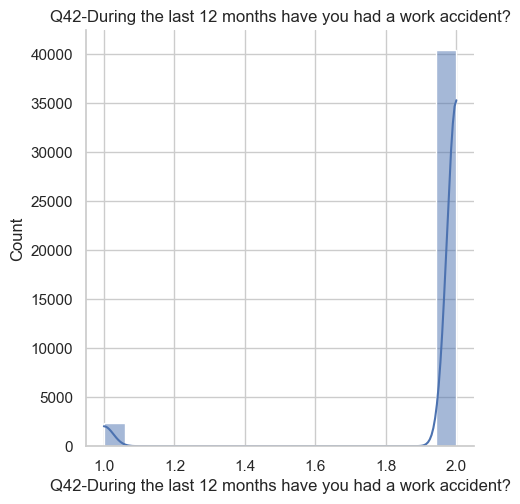

<Figure size 600x600 with 0 Axes>

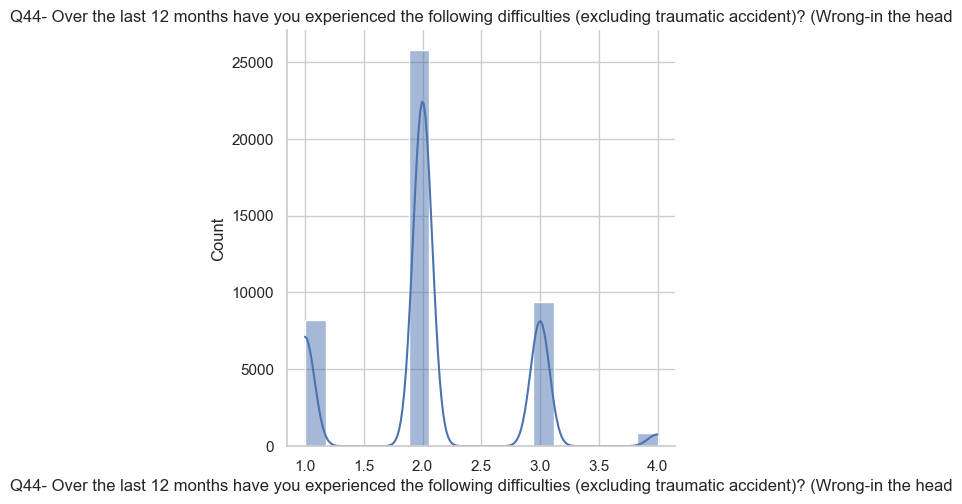

<Figure size 600x600 with 0 Axes>

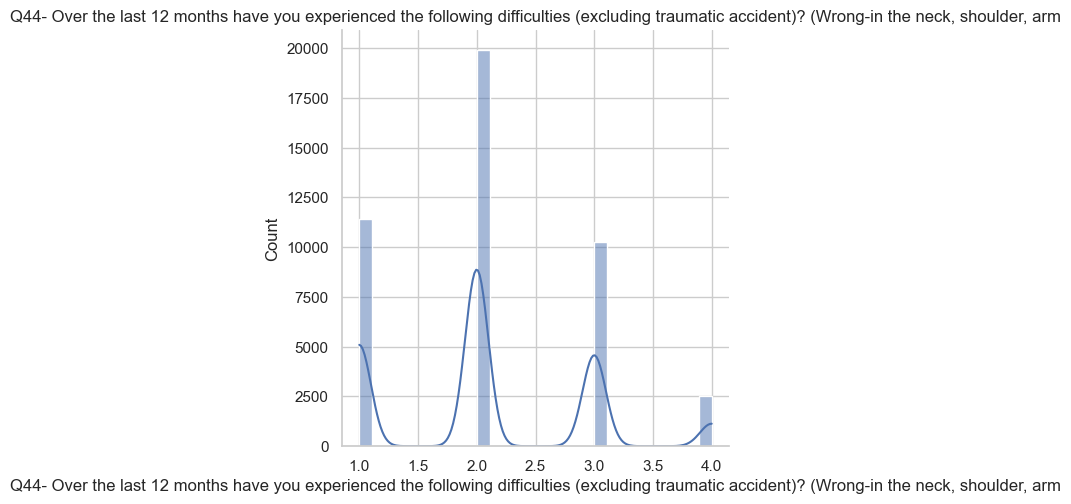

<Figure size 600x600 with 0 Axes>

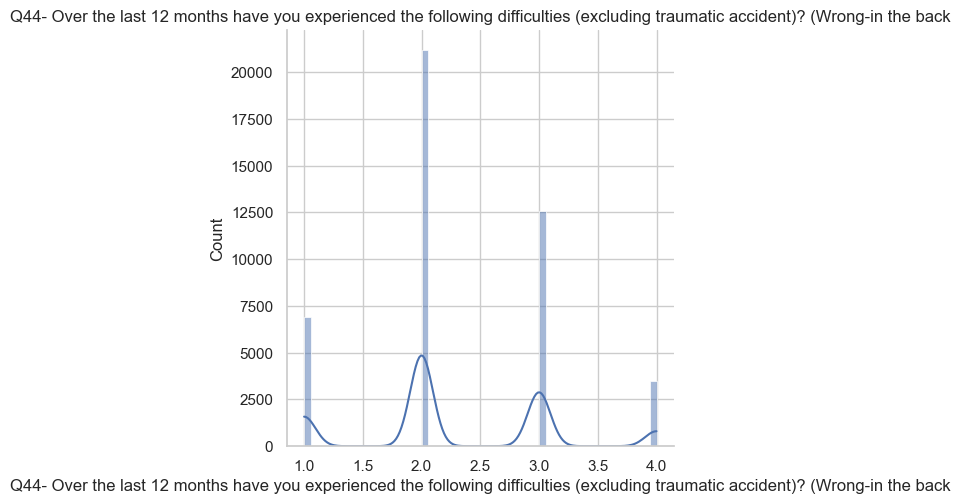

<Figure size 600x600 with 0 Axes>

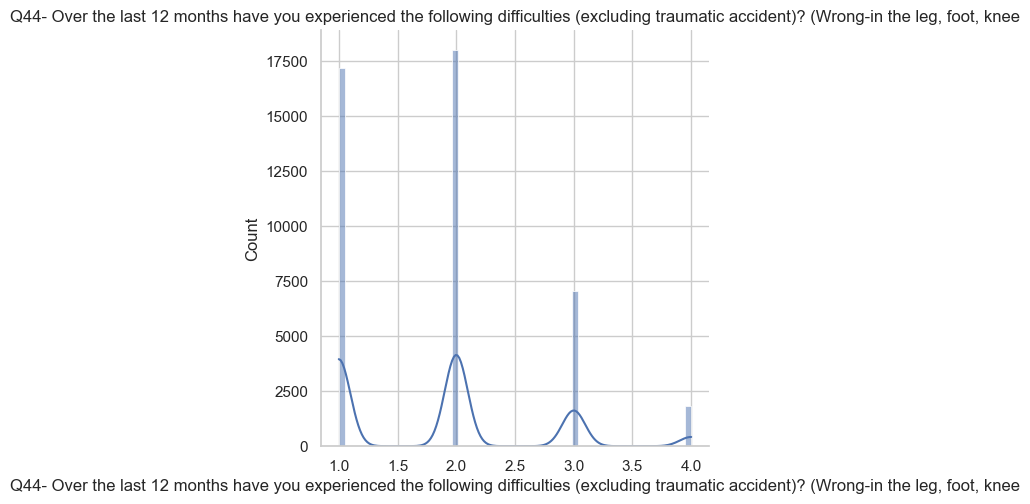

<Figure size 600x600 with 0 Axes>

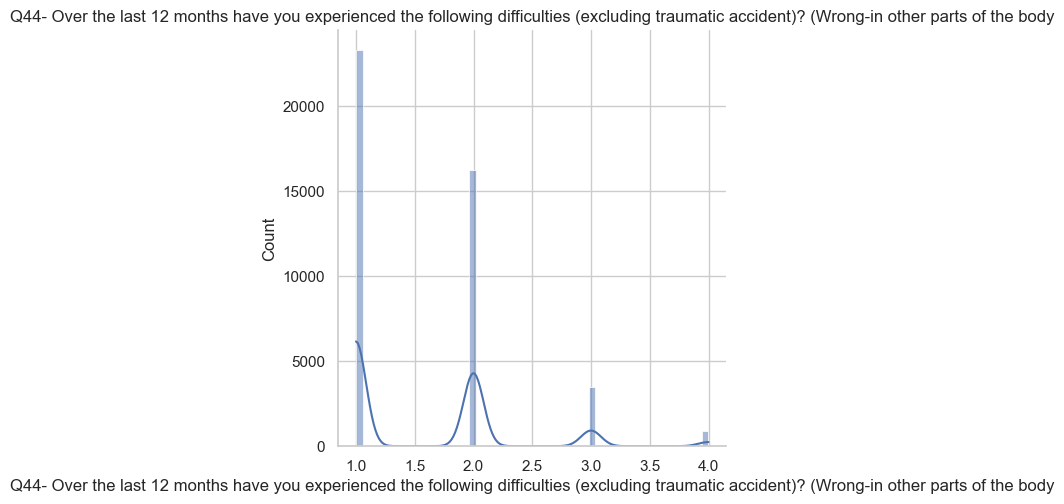

<Figure size 600x600 with 0 Axes>

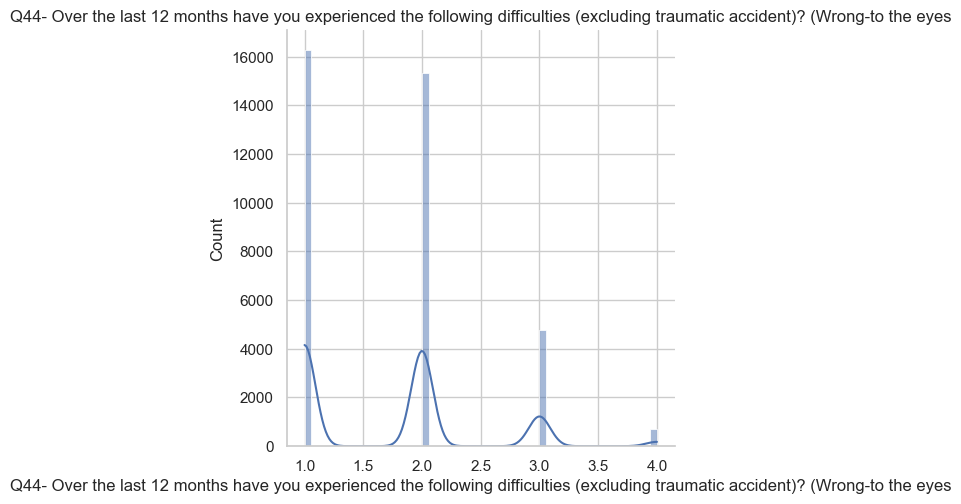

<Figure size 600x600 with 0 Axes>

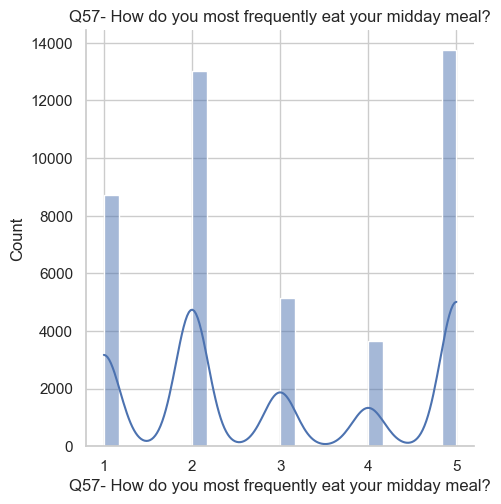

<Figure size 600x600 with 0 Axes>

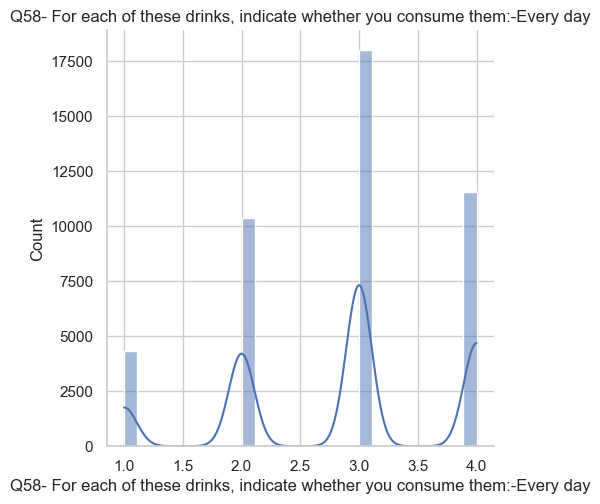

<Figure size 600x600 with 0 Axes>

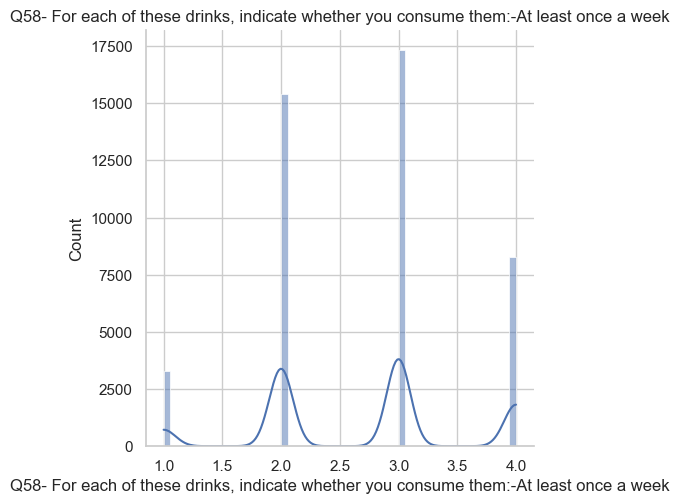

<Figure size 600x600 with 0 Axes>

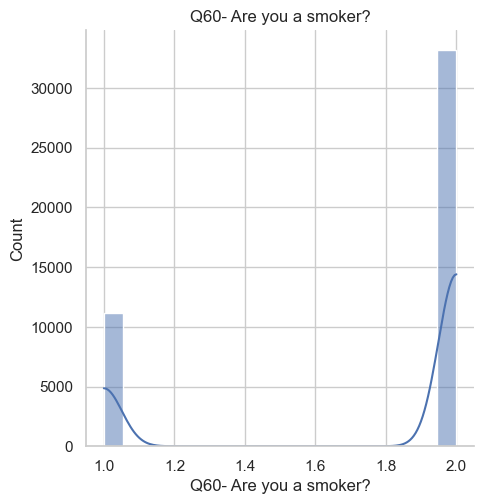

<Figure size 600x600 with 0 Axes>

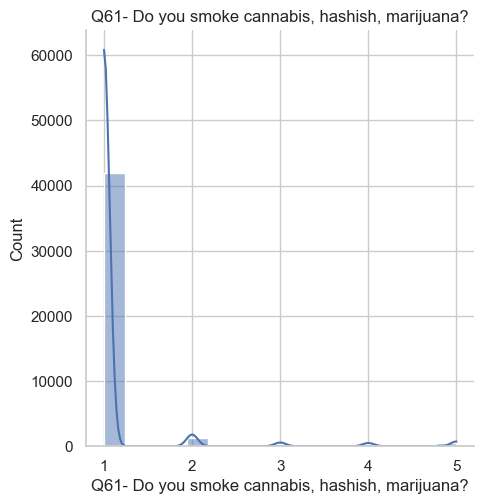

<Figure size 600x600 with 0 Axes>

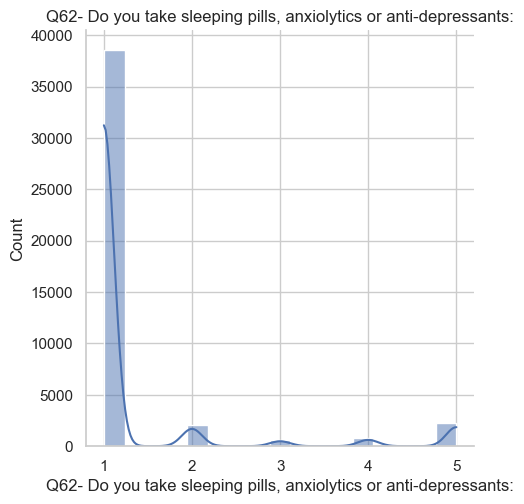

<Figure size 600x600 with 0 Axes>

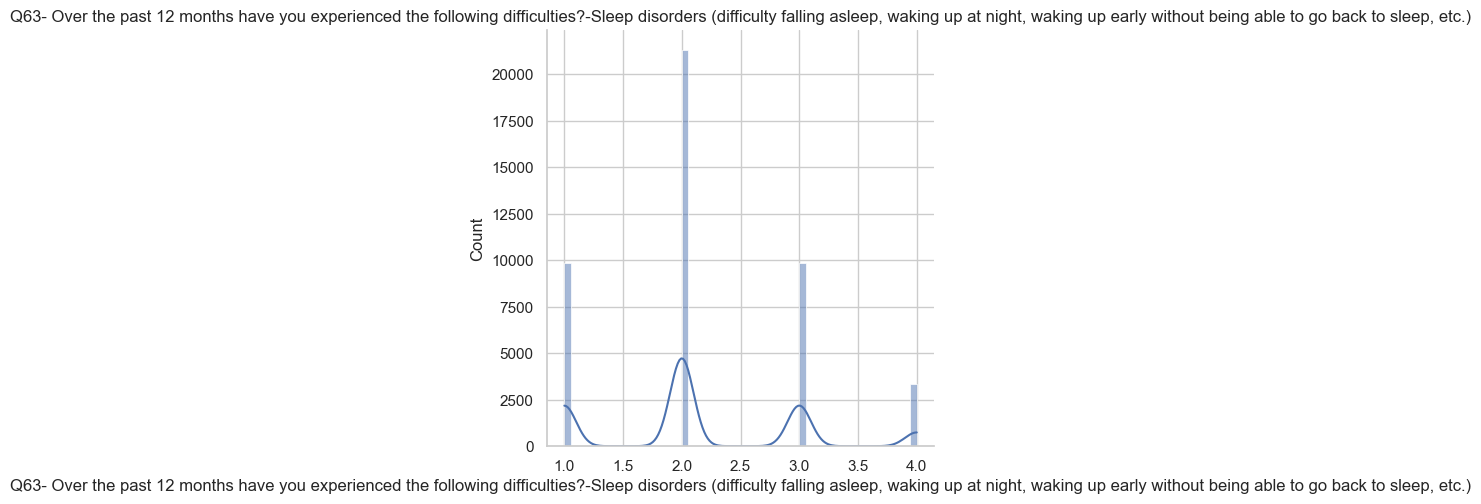

<Figure size 600x600 with 0 Axes>

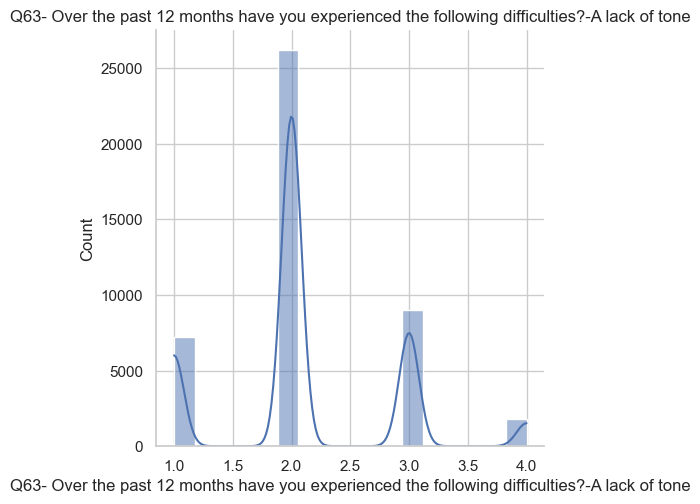

<Figure size 600x600 with 0 Axes>

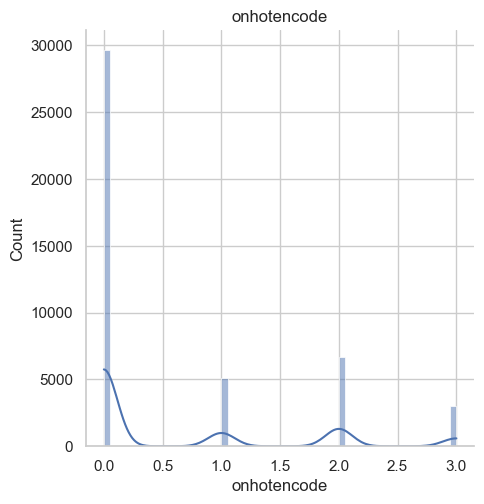

In [11]:
sns.set(style="whitegrid")

# plot distribution of all columns

for column in data.columns:
    plt.figure(figsize=(6,6))
    sns.displot(data[column], kde=True)
    plt.title(column)
    plt.show()

## Remove the "YEAR MMS" coloumn as it is about the year the survay was taken

In [12]:
#Remove the "YEAR MMS" coloumn as it is not needed

data.drop("YEAR MMS", axis=1, inplace=True)

## Results coloumns cleaning

In [13]:
# save the results coloumn names into a variable
results_cols = [
    "MONS ARRESTS FOR 3 DAYS",
    "STOPS OF 3 TO 5 DAYS",
    "STOPS OF MORE THAN 1 WEEK",
    "ARRESTS OF MORE THAN 1 MONTH",
    "(V5 V9) Sick leave of more than 3 months"
    ]

In [14]:
# Change the >3 and 0 values to NaN

for col in results_cols:
    # if the value is greater than 3, change the value to NaN
    data.loc[data[col] > 3, col] = None
    # if the value is 0, change the value to NaN
    data.loc[data[col] == 0, col] = None

# Training the data

- split data to train and test sets
- Train the Random Forest model


In [15]:
# Split the data for evaluation

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [16]:
# Fit blackbox model
sl = RandomForestClassifier()
sl.fit(X_train, y_train)
y_pred = sl.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.9971951431664345
Accuracy 0.9980913887953295


# Explanantion

In [17]:
explainer = shap.TreeExplainer(sl)
# Calculate shapley values for test data
start_index = 0
end_index = 10
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

Q1- Your sex?  Q2- How old are you?  STATUS  \
24039            2.0                   3.0     3.0   
34659            2.0                   1.0     3.0   
21130            1.0                   3.0     3.0   
1673             2.0                   NaN     1.0   
37471            1.0                   5.0     4.0   
39520            1.0                   2.0     4.0   
30833            1.0                   3.0     1.0   
5266             2.0                   2.0     1.0   
6319             1.0                   1.0     4.0   
28507            1.0                   2.0     1.0   

       In which sector of activity do you work?  \
24039                                       8.0   
34659                                       8.0   
21130                                       8.0   
1673                                        3.0   
37471                                       2.0   
39520                                       1.0   
30833                                       8.0   
5266                                        3.0   
6319                                        1.0   
28507                                       7.0   

       What is the size of your business (in total, all locations combined)? 2009 fake  \
24039                                                3.0                                 
34659                                                1.0                                 
21130                                                1.0                                 
1673                                                 4.0                                 
37471                                                4.0                                 
39520                                                3.0                                 
30833                                                4.0                                 
5266                                                 4.0                                 
6319                                                 1.0                                 
28507                                                4.0                                 

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
24039                                                0.0                                                                   
34659                                                0.0                                                                   
21130                                                0.0                                                                   
1673                                                 0.0                                                                   
37471                                                0.0                                                                   
39520                                                2.0                                                                   
30833                                                0.0                                                                   
5266                                                 0.0                                                                   
6319                                                 0.0                                                                   
28507                                                0.0                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
24039                                                0.0                                                                    
34659                                                0.0                                                                    
21130                                                0.0                                                               

In [18]:
y_test[start_index:end_index]

24039    0
34659    0
21130    0
1673     0
37471    1
39520    2
30833    0
5266     0
6319     1
28507    1
Name: onhotencode, dtype: int64

## SHAP Values

In [19]:
print(shap_values[0].shape)
shap_values

(103, 4)


array([[[-8.99438530e-04,  1.72160862e-04,  3.54401184e-04,
          3.72876485e-04],
        [ 6.51334807e-04, -8.10332998e-04,  5.79579102e-04,
         -4.20580911e-04],
        [ 4.26595124e-04, -5.53108812e-04,  2.45874301e-04,
         -1.19360613e-04],
        ...,
        [-1.29074861e-02,  6.30335228e-03,  4.33324595e-03,
          2.27088784e-03],
        [-2.99111398e-03,  8.67393005e-04,  1.00532910e-03,
          1.11839188e-03],
        [-4.54755704e-04,  1.68848554e-03, -3.22596078e-04,
         -9.11133755e-04]],

       [[-4.00234752e-04,  1.56841654e-04,  8.80249460e-05,
          1.55368152e-04],
        [-5.79799853e-03,  3.37446161e-03,  2.42070085e-03,
          2.83607783e-06],
        [-9.89685370e-04,  3.33842787e-04,  1.35358781e-03,
         -6.97745226e-04],
        ...,
        [ 2.30692413e-03, -1.40487076e-04, -6.64138714e-04,
         -1.50229834e-03],
        [ 1.12489310e-03, -3.30125031e-04, -2.11080575e-04,
         -5.83687495e-04],
        [ 1.061

In [20]:
shap.initjs()
# Force plot
prediction = sl.predict(X_test[start_index:end_index])[0]
print(f"The sl predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[...,1],
                X_test[start_index:end_index])  # for values

The sl predicted: 0


# Summary of Variables that affected the prediction

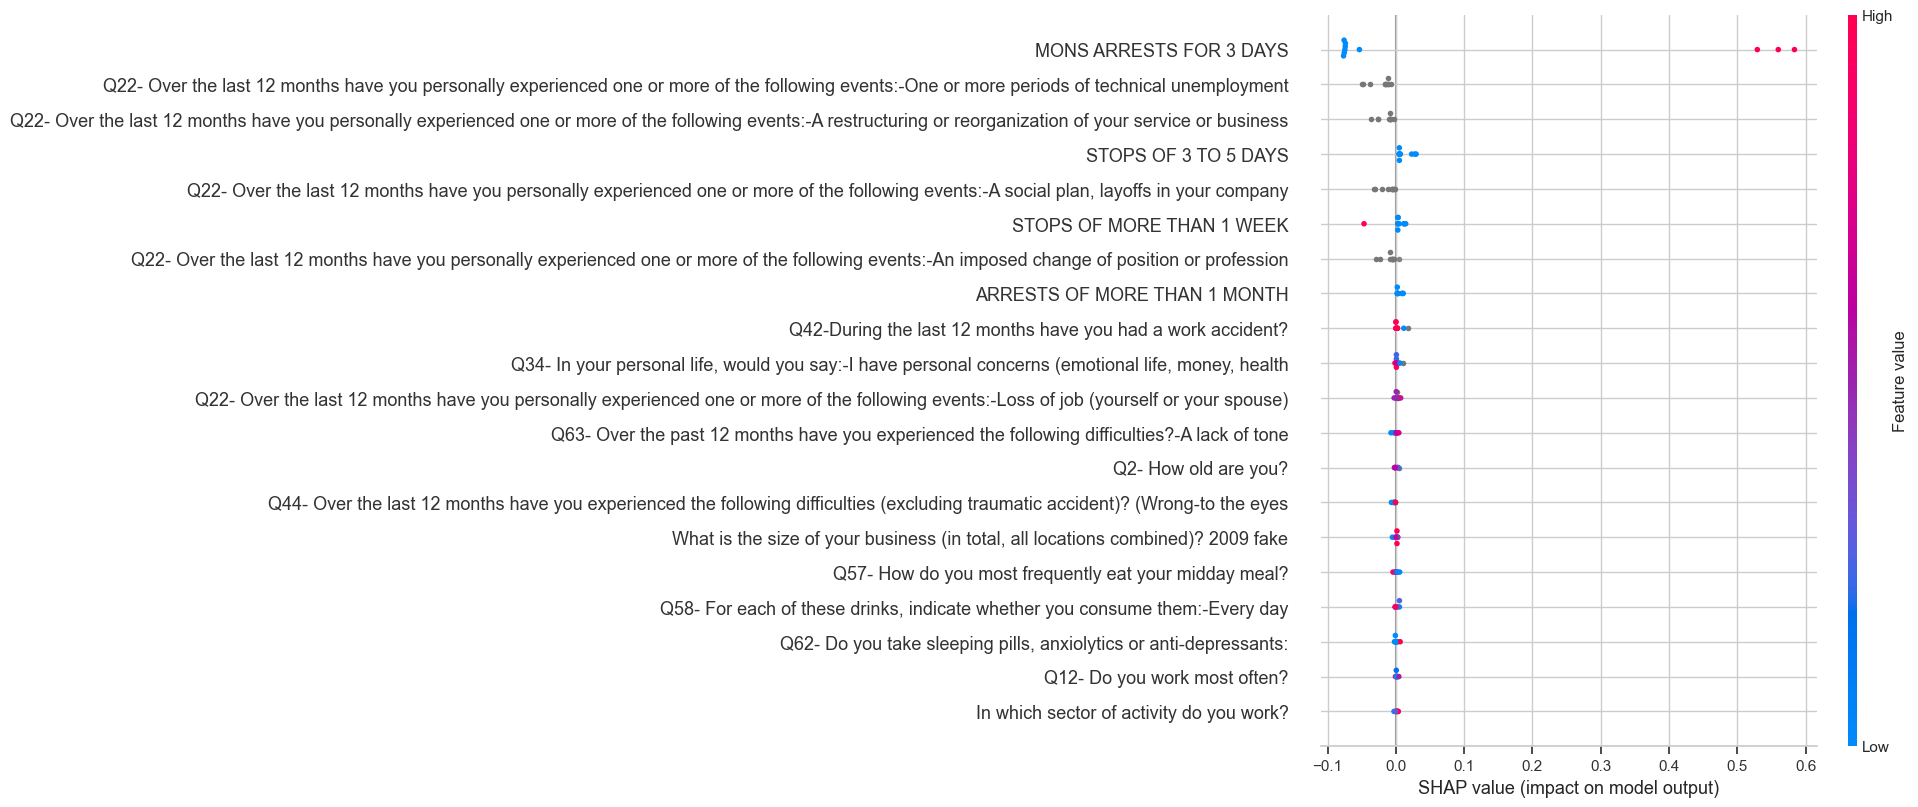

In [21]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index])